# **프로젝트 루브릭**

학습목표

1. 모델과 데이터를 정상적으로 불러오고, 작동하는 것을 확인하였다.

     - klue/bert-base를 NSMC 데이터셋으로 fine-tuning 하여, 모델이 정상적으로 작동하는 것을 확인하였다.

2. Preprocessing을 개선하고, fine-tuning을 통해 모델의 성능을 개선시켰다.

     - Validation accuracy를 90% 이상으로 개선하였다.

3. 모델 학습에 Bucketing을 성공적으로 적용하고, 그 결과를 비교분석하였다.

     - Bucketing task을 수행하여 fine-tuning 시 연산 속도와 모델 성능 간의 trade-off 관계가 발생하는지 여부를 확인하고, 분석한 결과를 제시하였다.

# **주요 진행 결과**


실험 # 0은 pretrained model에서 분류기 헤드만 교체하는 것을 진행 -> 시간과 성능이 우려되어 중단

실험 # 1은 6개 레이어를 fine tuning 하는 방식으로 진행

    블록 1 → 블록 2 → 블록 3 → 블록 4 → 블록 5 → 블록 6 → 블록 7

실험 # 2는 실험 # 1과 비교하기 위해서 Bucketing 도입 추가 블럭 진행

    실험1을 다 진행 후 → 블록 3-B → 블록 4-B → 블록 5-B → 블록 6-B



# **주요 분석 결과**

1.   GIGO! 요즘 지난 과제를 돌아보면서, 왜 기본적인 성능이 안나왔는지 분석해보았음. 기초적이지만 input이 좋지 않으면 output이 좋지 않다는 것을 다시 깨우치게 되었음.

2.   이번 과제에서 과거 경험을 토대로 먼저 EDA에 시간을 더 투자하고 향후 효과를 분석해보고자 했음. 그 결과 다음과 같은 발견과 개선 노력을 하였음
    
      A. NSMC 자료에는 전처리 단계에서 고려해야할 추가적인 여러 요소가 있었음.
      
      B. 예를 들면, 영어 및 외국어 단어의 문장내 비율이 높아서 일반적인 한국어 문장으로 학습시킬때 문제가 되는 샘플에 대한 판단하였음.

      C. 또한, 특수문장 부호가 구어체에서는 많이 사용되는데 다수의 특수 문장 부호가 들어간 문장들을 어떻게 판단할 것인가에 대해서 검토하였음.
      
      D. 위를 반영하여 전처리에서 옵션을 만들고 구현해봤음.
      
      E. 그 결과 막연하게 하이퍼파라미터를 조정하면서 실험하면서 성능개선 방향이 모호했던 이전의 실험보다, 보다 안정적인 실험과 분석이 가능해졌음.
      
      F. 자나깨나 전처리! 시작할 때 데이터를 찬찬히 뜯어보자! 코딩 전에 전에 생각해보기!를 느꼈음.

3.   Bucketing의 결과는 가능성을 보여줬다고 생각 됨. 예상과는 달리 성능은 오히려 미미하게 개선되었고 오히려 소요시간은 미미하게 증가했다.
    
      A. Bucketing의 일반적 효과로 연산속도 증가, GPU 메모리 효율 개선, gradient 품질 안정화 등을 언급함.

      B. 그러나 본 모델은 매우 큰 데이터에 기반한 거대 모델이 아니어서 눈에 확 띄는 성과가 나타나지는 않은 것으로 분석된다.

      C. 예상 분석에 따르면, bucketing은 시간 단축에서 큰 효과가 있을 것으로 판단되어서 초거대 모델에서 도입시 가치가 높을 것으로 보임

4.  마지막으로 예문을 통해서 정성적 평가를 해보았다. 적절하게 분류되고 있는 것으로 평가된다.

# **성능 비교**

미미한 차이로 분석됨

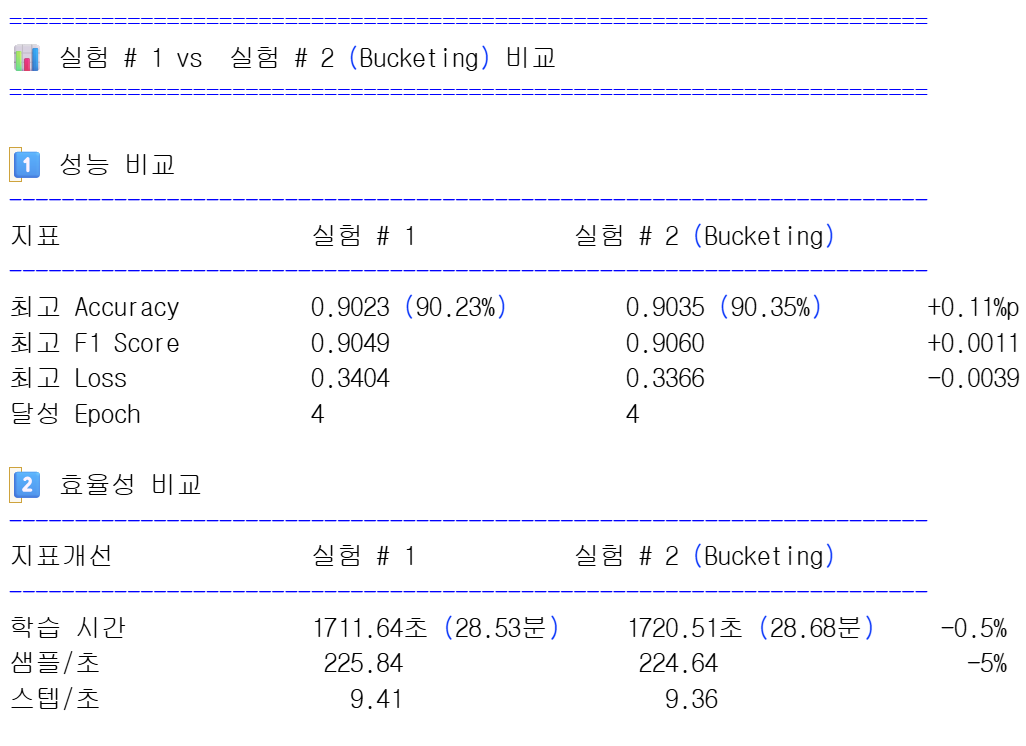

# **소회**

어느덧 심화 과정도 후반부로 접어들었다. 몇달 전 처음 코딩 세계를 접했던 기억이 난다. 요즘은 조금 더 IT 개발에서 생각해야 하는 중요한 관점을 깨닫게 된다. 성능이 좋다고 해서 기계에 완전히 맏겨서 안되고 또 인공지능에 거리를 두고 활용 못하는 것도 문제가 많다. 그 중간 어디쯤에 적절한 선택을 해야 사람도 컴퓨터도 공존 할 수 있을 것 같다. 나는 첨에는 인공지능을 전혀 다루지 못하다가 한동안 모든 것을 맡겨서 gpt 부탁해! 식으로도 해봤다. 요새는 코딩의 블럭 단위를 올려서 인공지능과 좀더 세밀한 분석하기도 하고 때로는 특정 데이터의 전체 흐름과 관련된 Debugging을 위해 전체 파일을 통째로 올려보기도 한다. 또, 사용하는 인공지능도 다양해졌다. 각각이 적합한 방식 혹은 필요한 때가 있는 것 같다.  이번 과제는 어떻게 인공지능 개발 업무를 다뤄야할 지 여러가지로 생각하게 되었다.

# **셋팅 및 준비단계**

In [ ]:
#data_dir = '/content/work/bert_pretrain/data'

#vocab loading
#vocab = spm.SentencePieceProcessor()
#vocab.load(f"{data_dir}/ko_8000.model")


True

In [11]:
import tensorflow
import numpy
import transformers
import datasets

print(tensorflow.__version__)
print(numpy.__version__)
print(transformers.__version__)
print(datasets.__version__)

2.19.0
2.0.2
4.57.2
4.0.0


In [12]:
#작업디렉토리 생성
!mkdir -p /content/work/bert_pretrain/data
!mkdir -p /content/work/bert_pretrain/models
!mkdir -p /content/work/bert_pretrain/libs
!mkdir -p /content/work/bert_pretrain/nsmc

In [13]:
import transformers
import accelerate
print(transformers.__version__)
print(accelerate.__version__)

4.57.2
1.12.0


In [14]:
# 모델이 제대로 장착되었는지 추론까지 예제로 테스트!
!python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('I love you'))"

2025-12-02 05:05:39.007323: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764651939.057328   40544 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764651939.072484   40544 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764651939.096869   40544 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764651939.096909   40544 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764651939.096917   40544 computation_placer.cc:177] computation placer alr

In [15]:
# huggingface 활용을 위한 dataset 설치
!pip install datasets

In [18]:
# 학습데이터 다운로드 및 확인
!wget -O /content/work/bert_pretrain/nsmc/ratings_train.txt https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
!wget -O /content/work/bert_pretrain/nsmc/ratings_test.txt https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

from datasets import load_dataset

# NSMC 데이터셋 로드
dataset = load_dataset("csv", data_files={'train': '/content/work/bert_pretrain/nsmc/ratings_train.txt', 'test': '/content/work/bert_pretrain/nsmc/ratings_test.txt'}, sep='\t')

# 데이터셋 구조 확인
print(dataset)

# 샘플 확인
print(dataset['train'][0])

--2025-12-02 05:08:37--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘/content/work/bert_pretrain/nsmc/ratings_train.txt’

/content/work/bert_ 100%[===================>]  13.95M  --.-KB/s    in 0.05s   

2025-12-02 05:08:38 (276 MB/s) - ‘/content/work/bert_pretrain/nsmc/ratings_train.txt’ saved [14628807/14628807]

--2025-12-02 05:08:38--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awai

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 50000
    })
})
{'id': 9976970, 'document': '아 더빙.. 진짜 짜증나네요 목소리', 'label': 0}


In [19]:
# 한글폰트 설치
!sudo apt update
!sudo apt install fonts-nanum

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 1s (182 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
58 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acqu

설치된 나눔 폰트:
  - NanumBarunpen
  - NanumGothic
  - NanumGothic
  - NanumGothicCoding
  - NanumSquareRound
  - NanumSquareRound
  - NanumSquare_ac
  - NanumGothic
  - NanumSquareRound
  - NanumSquareRound
  - NanumBarunGothic
  - NanumGothic
  - NanumSquare_ac
  - NanumBarunGothic YetHangul
  - NanumGothicCoding
  - NanumMyeongjo
  - NanumSquare
  - NanumBarunGothic
  - Nanum Pen Script
  - NanumSquare
  - NanumBarunGothic
  - NanumSquare_ac
  - NanumSquare_ac
  - NanumSquare
  - NanumBarunGothic
  - NanumBarunpen
  - Nanum Brush Script
  - NanumMyeongjo Eco
  - NanumGothic Eco
  - NanumMyeongjo
  - NanumSquare
  - NanumMyeongjo YetHangul
  - NanumMyeongjo

현재 설정된 폰트: ['NanumGothic']


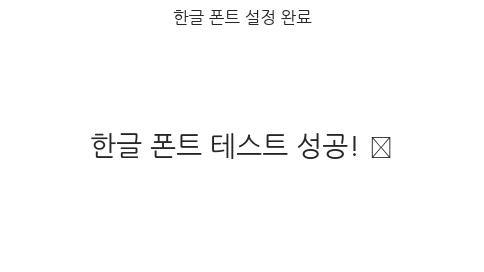


✅ 한글 폰트 설정이 완료되었습니다!


In [21]:
# ============================================
# 한글 폰트 설정 및 테스트
# ============================================

# 3. 설치된 폰트 확인
import matplotlib.font_manager as fm

# 사용 가능한 한글 폰트 확인
font_list = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
print("설치된 나눔 폰트:")
for font in font_list:
    print(f"  - {font}")

# 4. matplotlib 한글 폰트 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 5. 설정 확인
print(f"\n현재 설정된 폰트: {plt.rcParams['font.family']}")

# 6. 테스트
fig, ax = plt.subplots(figsize=(6, 3))
ax.text(0.5, 0.5, '한글 폰트 테스트 성공! 😊',
        fontsize=20, ha='center', va='center')
ax.axis('off')
plt.title('한글 폰트 설정 완료')
plt.show()

print("\n✅ 한글 폰트 설정이 완료되었습니다!")

# **EDA 및 데이터 전처리**

<전처리 요약>

  제거되는 데이터

      결측치: 빈 리뷰 제거
      중복: 동일한 리뷰 중복 제거
      너무 짧은 리뷰: 2자 이하 (예: "아", "!")
      한글 없는 리뷰: 특수문자나 숫자만 있는 리뷰
      의미 없는 리뷰: 한글이 3자 미만인 리뷰

  정규화 작업

      연속된 공백 제거
      과도한 특수문자 반복 축약 (!!! → !!)
      양쪽 공백 제거

✅ 설정된 폰트: NanumGothic
✅ 최종 폰트: ['NanumGothic']

1. 데이터 로딩
✅ 학습 데이터 크기: (150000, 3)
✅ 테스트 데이터 크기: (50000, 3)

2. 데이터 기본 정보

[학습 데이터 구조]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
None

[학습 데이터 샘플 5개]
         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

[컬럼별 데이터 타입]
id           int64
document    object
label        int6

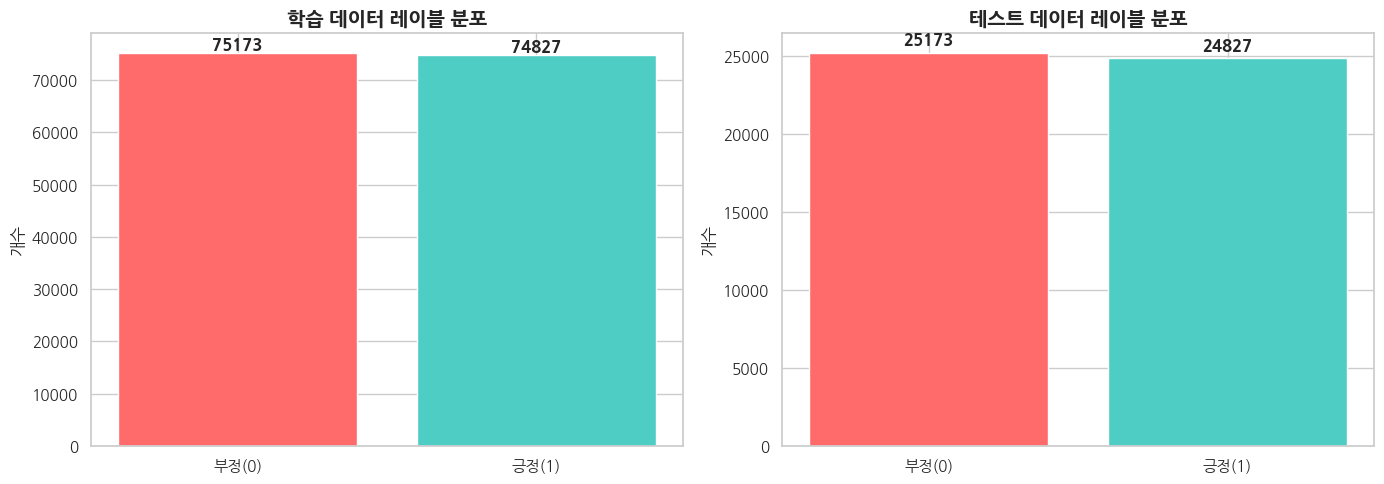


6. 텍스트 길이 분석

[학습 데이터 - 문자 수 통계]
count    149995.000000
mean         35.204527
std          29.531890
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         146.000000
Name: char_length, dtype: float64

[학습 데이터 - 단어 수 통계]
count    149995.00000
mean          7.58516
std           6.51406
min           1.00000
25%           3.00000
50%           6.00000
75%           9.00000
max          41.00000
Name: word_count, dtype: float64

[테스트 데이터 - 문자 수 통계]
count    49997.000000
mean        35.320259
std         29.648310
min          1.000000
25%         16.000000
50%         27.000000
75%         43.000000
max        144.000000
Name: char_length, dtype: float64

[테스트 데이터 - 단어 수 통계]
count    49997.000000
mean         7.609897
std          6.533918
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         42.000000
Name: word_count, dtype: float64


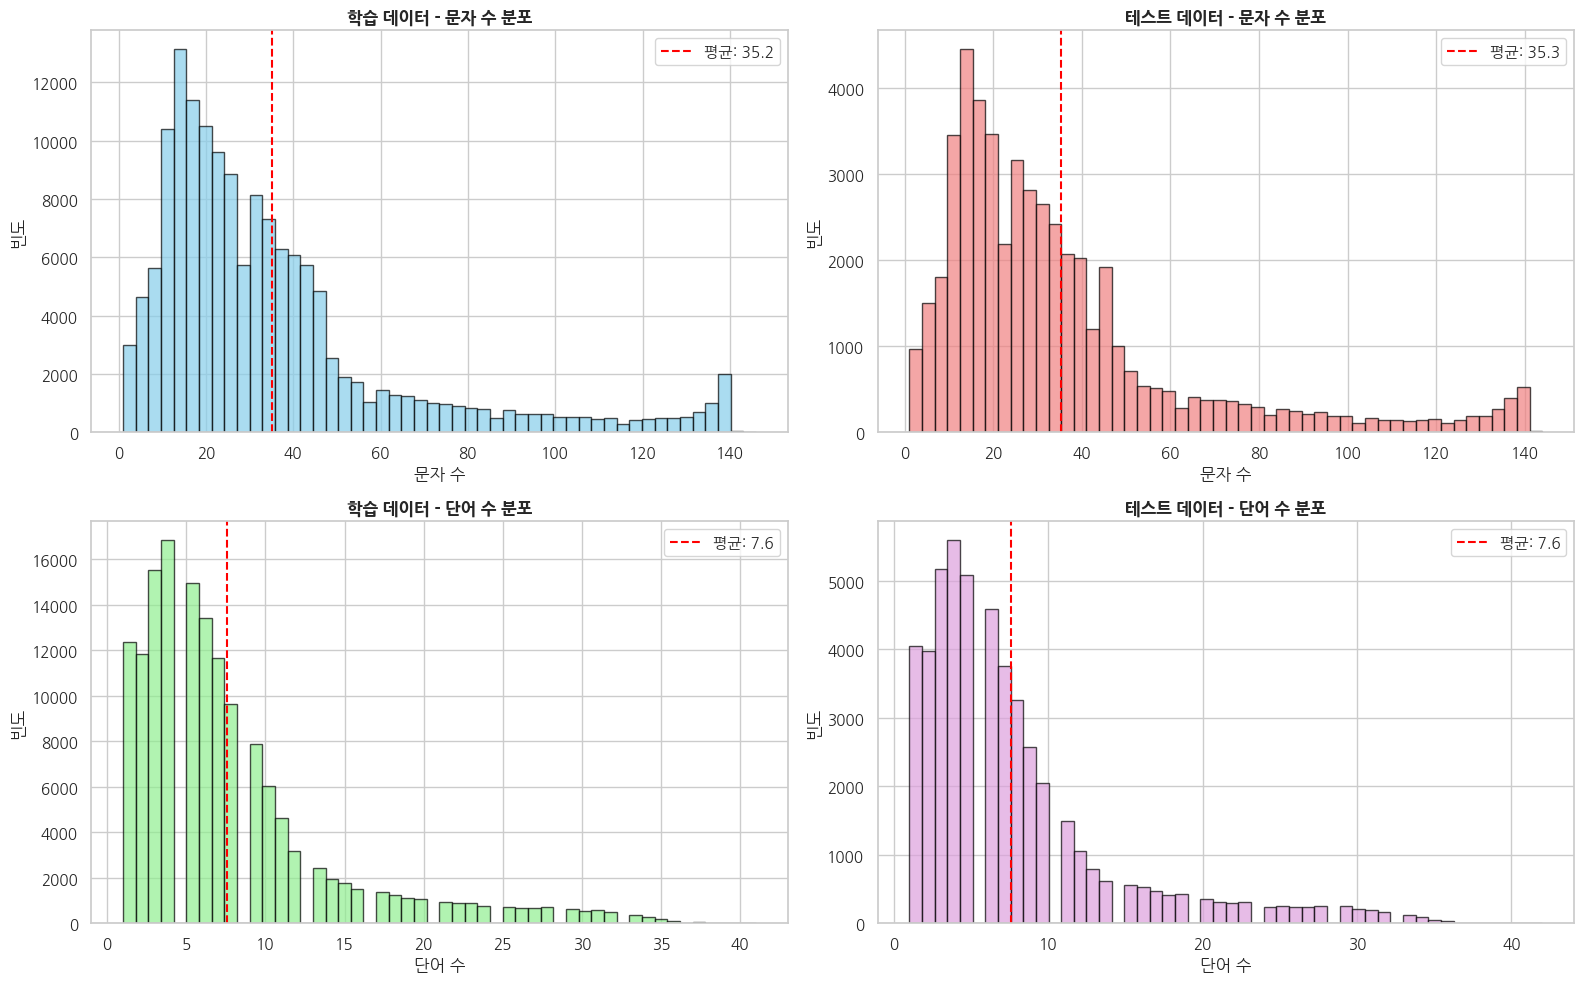


7. 긍정/부정 리뷰 길이 비교

[긍정 리뷰 평균 길이]
문자 수: 34.60
단어 수: 7.51

[부정 리뷰 평균 길이]
문자 수: 35.81
단어 수: 7.66


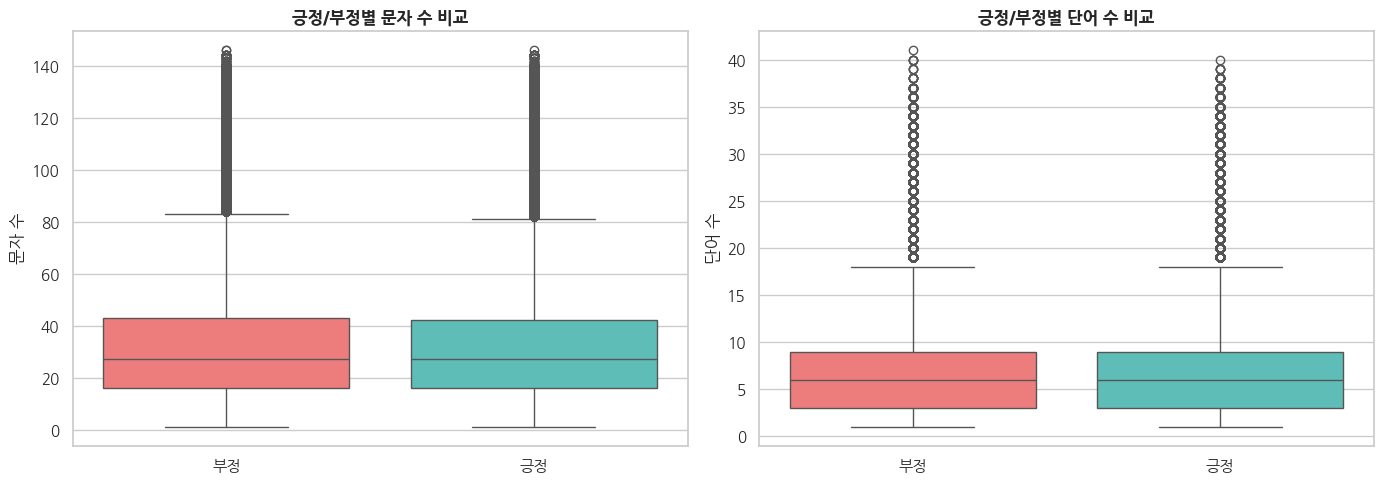


8. 극단적인 리뷰 예시

[가장 짧은 리뷰 5개]
  [부정] 아 (길이: 1)
  [긍정] 잼 (길이: 1)
  [부정] 1 (길이: 1)
  [부정] 4 (길이: 1)
  [부정] 4 (길이: 1)

[가장 긴 리뷰 5개]
  [부정] "스폰으로 먹고사는 방송이라 어쩔수 없다고 하지만. 이건 그냥 비현실적인 자동차만;...독일3사&슈퍼카 홍보 프로그램도 아니구.대중적인 자동차 방송으로 이루어 졌으면 합니다. 보는... (길이: 146)
  [부정] """니 짓은 생각않고, 웬 복수!""의 교훈이라! 그럼 ""서바이벌 액션""으로 홍보하면 안되지! 초반 45분은 멋지게 열더니.. 억지 반전, 하드고어로 시간끌다가, 허둥지둥 화... (길이: 146)
  [긍정] "2007.02.25_ 벌교의 한 국밥집_ 점심: ""갸는 첫째고, 저 놈은 우리 둘째~"" 재문: ""아줌마! 미안해~ 그냥.. 아줌마! 나 그 남방 잘 어울려ㅠ_ㅠ?"" 대식에... (길이: 146)
  [긍정] "상처투성이인 한국인을 위하여 어제는 추기경님이 계셨고 오늘은 교황님께서 치유하시고 가셨습니다. "" 고난이 나를 찾을때 피하고 싶은 내마음은""하시며 노래부르실때는 한 인간으로서... (길이: 144)
  [긍정] "이제 어른들이 어떻게 하면 좋을까? 라는 대사에서 느껴지는 무책임. 담임이 자신의 딸에게 ""무책임? 그런 건 몰라!"" 에서 느껴지는 이중적인 모습에 소름 돋았다. 서바이벌 게... (길이: 144)

9. 특수 문자 및 패턴 분석
특수문자 포함: 97719 (65.15%)
숫자 포함: 20427 (13.62%)
영어 포함: 8794 (5.86%)


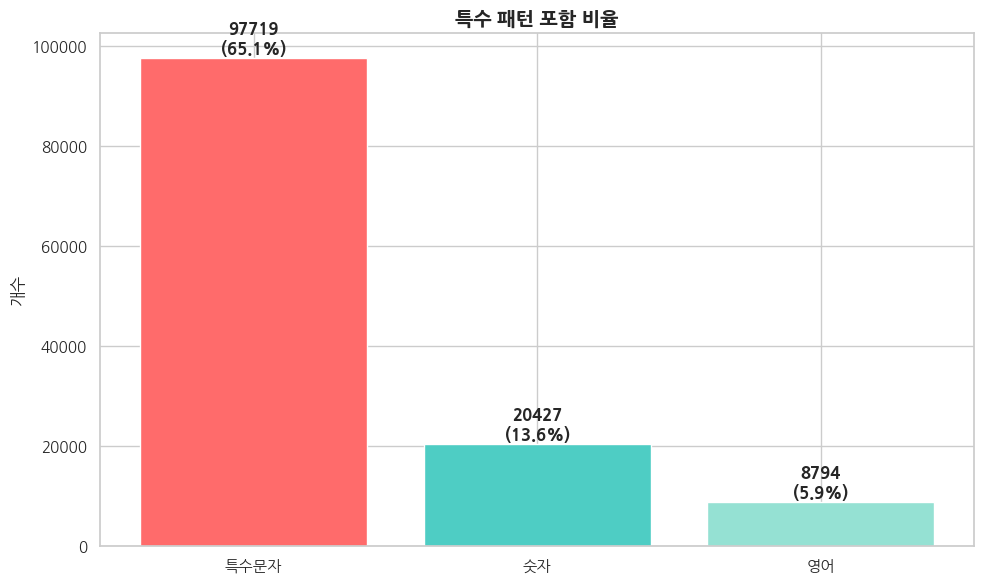


10. 자주 등장하는 단어 Top 20

[긍정 리뷰 - 자주 등장하는 단어 Top 20]
  영화: 10515회
  정말: 5728회
  너무: 4536회
  진짜: 3238회
  이: 3093회
  최고의: 2081회
  수: 2061회
  잘: 1968회
  더: 1838회
  보고: 1646회
  최고: 1570회
  점: 1476회
  이런: 1476회
  그: 1472회
  영화를: 1462회
  본: 1454회
  드라마: 1370회
  다시: 1333회
  봤는데: 1308회
  있는: 1302회

[부정 리뷰 - 자주 등장하는 단어 Top 20]
  영화: 8751회
  너무: 4078회
  진짜: 3589회
  정말: 2863회
  그냥: 2688회
  이: 2552회
  왜: 2372회
  이런: 2028회
  점: 1727회
  좀: 1690회
  이건: 1682회
  다: 1647회
  쓰레기: 1570회
  영화는: 1478회
  더: 1477회
  없다: 1460회
  영화를: 1383회
  이게: 1375회
  아: 1351회
  영화가: 1328회


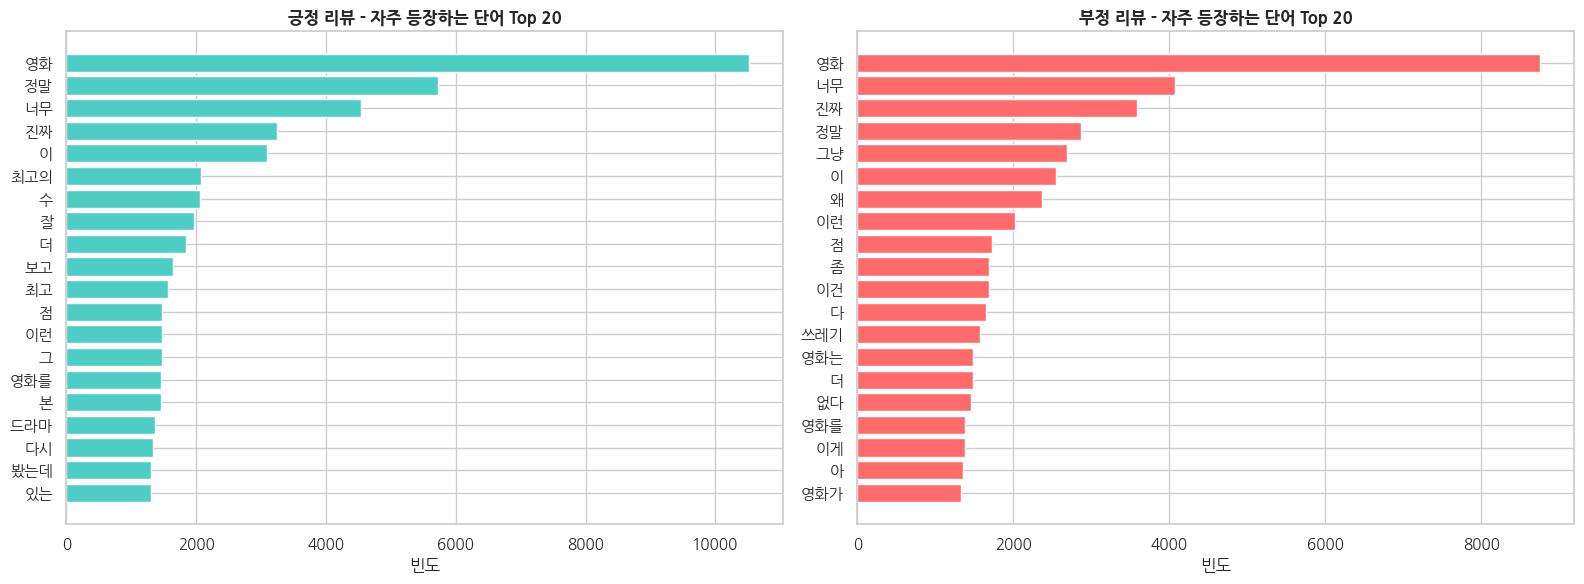


📊 EDA 최종 요약

✅ 데이터 크기
   - 학습: 150,000개
   - 테스트: 50,000개

✅ 데이터 품질
   - 학습 결측치: 5개
   - 테스트 결측치: 3개
   - 학습 중복: 3817개
   - 테스트 중복: 842개

✅ 클래스 균형
   - 학습 부정: 75173 (50.1%)
   - 학습 긍정: 74827 (49.9%)

✅ 텍스트 길이
   - 평균 문자 수: 35.2자
   - 평균 단어 수: 7.6개
   - 최소 길이: 1자
   - 최대 길이: 146자

✅ 권장 전처리
   1. 결측치 제거 (dropna)
   2. 중복 제거 (drop_duplicates)
   3. 텍스트 정규화 (필요시)
   4. 최대 시퀀스 길이: 128~256 (대부분의 데이터 커버)



In [22]:
# EDA 실행
# 필요한 라이브러리 설치 및 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# ============================================
# 한글 폰트 강제 설정
# ============================================
import matplotlib.font_manager as fm
from matplotlib import rc

# 나눔고딕 폰트 경로 직접 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 등록
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()

# rc 파라미터로 설정 (더 강력함)
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

print(f"✅ 설정된 폰트: {font_name}")

# 시각화 스타일 설정
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.0)

# 폰트 재설정 (seaborn이 덮어쓰기 때문)
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

print(f"✅ 최종 폰트: {plt.rcParams['font.family']}")
print()

# ============================================
# 1. 데이터 로드
# ============================================
print("="*60)
print("1. 데이터 로딩")
print("="*60)

train_df = pd.read_csv('/content/work/bert_pretrain/nsmc/ratings_train.txt', sep='\t')
test_df = pd.read_csv('/content/work/bert_pretrain/nsmc/ratings_test.txt', sep='\t')

print(f"✅ 학습 데이터 크기: {train_df.shape}")
print(f"✅ 테스트 데이터 크기: {test_df.shape}")
print()

# ============================================
# 2. 기본 정보 확인
# ============================================
print("="*60)
print("2. 데이터 기본 정보")
print("="*60)

print("\n[학습 데이터 구조]")
print(train_df.info())

print("\n[학습 데이터 샘플 5개]")
print(train_df.head())

print("\n[컬럼별 데이터 타입]")
print(train_df.dtypes)
print()

# ============================================
# 3. 결측치 분석
# ============================================
print("="*60)
print("3. 결측치 분석")
print("="*60)

print("\n[학습 데이터 결측치]")
print(train_df.isnull().sum())
print(f"전체 결측치 비율: {train_df.isnull().sum().sum() / len(train_df) * 100:.2f}%")

print("\n[테스트 데이터 결측치]")
print(test_df.isnull().sum())
print(f"전체 결측치 비율: {test_df.isnull().sum().sum() / len(test_df) * 100:.2f}%")

# 결측치 예시 확인
if train_df['document'].isnull().sum() > 0:
    print("\n[결측치가 있는 행 예시]")
    print(train_df[train_df['document'].isnull()].head())
print()

# ============================================
# 4. 중복 데이터 분석
# ============================================
print("="*60)
print("4. 중복 데이터 분석")
print("="*60)

train_duplicates = train_df.duplicated(subset=['document']).sum()
test_duplicates = test_df.duplicated(subset=['document']).sum()

print(f"학습 데이터 중복: {train_duplicates}개 ({train_duplicates/len(train_df)*100:.2f}%)")
print(f"테스트 데이터 중복: {test_duplicates}개 ({test_duplicates/len(test_df)*100:.2f}%)")

# 중복 예시
if train_duplicates > 0:
    print("\n[중복된 리뷰 예시]")
    duplicate_docs = train_df[train_df.duplicated(subset=['document'], keep=False)].sort_values('document')
    print(duplicate_docs.head(10))
print()

# ============================================
# 5. 레이블 분포 분석
# ============================================
print("="*60)
print("5. 레이블 분포 (클래스 불균형 확인)")
print("="*60)

print("\n[학습 데이터 레이블 분포]")
train_label_counts = train_df['label'].value_counts()
print(train_label_counts)
print(f"부정(0): {train_label_counts[0]} ({train_label_counts[0]/len(train_df)*100:.2f}%)")
print(f"긍정(1): {train_label_counts[1]} ({train_label_counts[1]/len(train_df)*100:.2f}%)")

print("\n[테스트 데이터 레이블 분포]")
test_label_counts = test_df['label'].value_counts()
print(test_label_counts)
print(f"부정(0): {test_label_counts[0]} ({test_label_counts[0]/len(test_df)*100:.2f}%)")
print(f"긍정(1): {test_label_counts[1]} ({test_label_counts[1]/len(test_df)*100:.2f}%)")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 학습 데이터
axes[0].bar(['부정(0)', '긍정(1)'], train_label_counts.values, color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('학습 데이터 레이블 분포', fontsize=14, fontweight='bold')
axes[0].set_ylabel('개수')
for i, v in enumerate(train_label_counts.values):
    axes[0].text(i, v + 500, str(v), ha='center', fontweight='bold')

# 테스트 데이터
axes[1].bar(['부정(0)', '긍정(1)'], test_label_counts.values, color=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('테스트 데이터 레이블 분포', fontsize=14, fontweight='bold')
axes[1].set_ylabel('개수')
for i, v in enumerate(test_label_counts.values):
    axes[1].text(i, v + 500, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
print()

# ============================================
# 6. 텍스트 길이 분석
# ============================================
print("="*60)
print("6. 텍스트 길이 분석")
print("="*60)

# 결측치 제거 후 분석
train_clean = train_df.dropna(subset=['document'])
test_clean = test_df.dropna(subset=['document'])

# 문자 수 계산
train_clean['char_length'] = train_clean['document'].apply(len)
test_clean['char_length'] = test_clean['document'].apply(len)

# 단어 수 계산 (공백 기준)
train_clean['word_count'] = train_clean['document'].apply(lambda x: len(str(x).split()))
test_clean['word_count'] = test_clean['document'].apply(lambda x: len(str(x).split()))

print("\n[학습 데이터 - 문자 수 통계]")
print(train_clean['char_length'].describe())

print("\n[학습 데이터 - 단어 수 통계]")
print(train_clean['word_count'].describe())

print("\n[테스트 데이터 - 문자 수 통계]")
print(test_clean['char_length'].describe())

print("\n[테스트 데이터 - 단어 수 통계]")
print(test_clean['word_count'].describe())

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 문자 수 분포 - 학습 데이터
axes[0, 0].hist(train_clean['char_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(train_clean['char_length'].mean(), color='red', linestyle='--',
                   label=f'평균: {train_clean["char_length"].mean():.1f}')
axes[0, 0].set_title('학습 데이터 - 문자 수 분포', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('문자 수')
axes[0, 0].set_ylabel('빈도')
axes[0, 0].legend()

# 문자 수 분포 - 테스트 데이터
axes[0, 1].hist(test_clean['char_length'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(test_clean['char_length'].mean(), color='red', linestyle='--',
                   label=f'평균: {test_clean["char_length"].mean():.1f}')
axes[0, 1].set_title('테스트 데이터 - 문자 수 분포', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('문자 수')
axes[0, 1].set_ylabel('빈도')
axes[0, 1].legend()

# 단어 수 분포 - 학습 데이터
axes[1, 0].hist(train_clean['word_count'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(train_clean['word_count'].mean(), color='red', linestyle='--',
                   label=f'평균: {train_clean["word_count"].mean():.1f}')
axes[1, 0].set_title('학습 데이터 - 단어 수 분포', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('단어 수')
axes[1, 0].set_ylabel('빈도')
axes[1, 0].legend()

# 단어 수 분포 - 테스트 데이터
axes[1, 1].hist(test_clean['word_count'], bins=50, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(test_clean['word_count'].mean(), color='red', linestyle='--',
                   label=f'평균: {test_clean["word_count"].mean():.1f}')
axes[1, 1].set_title('테스트 데이터 - 단어 수 분포', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('단어 수')
axes[1, 1].set_ylabel('빈도')
axes[1, 1].legend()

plt.tight_layout()
plt.show()
print()

# ============================================
# 7. 긍정/부정별 텍스트 길이 비교
# ============================================
print("="*60)
print("7. 긍정/부정 리뷰 길이 비교")
print("="*60)

print("\n[긍정 리뷰 평균 길이]")
pos_mean_char = train_clean[train_clean['label']==1]['char_length'].mean()
pos_mean_word = train_clean[train_clean['label']==1]['word_count'].mean()
print(f"문자 수: {pos_mean_char:.2f}")
print(f"단어 수: {pos_mean_word:.2f}")

print("\n[부정 리뷰 평균 길이]")
neg_mean_char = train_clean[train_clean['label']==0]['char_length'].mean()
neg_mean_word = train_clean[train_clean['label']==0]['word_count'].mean()
print(f"문자 수: {neg_mean_char:.2f}")
print(f"단어 수: {neg_mean_word:.2f}")

# 박스플롯으로 비교
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 문자 수 비교
train_clean['label_name'] = train_clean['label'].map({0: '부정', 1: '긍정'})
sns.boxplot(data=train_clean, x='label_name', y='char_length', ax=axes[0], palette=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('긍정/부정별 문자 수 비교', fontsize=12, fontweight='bold')
axes[0].set_ylabel('문자 수')
axes[0].set_xlabel('')

# 단어 수 비교
sns.boxplot(data=train_clean, x='label_name', y='word_count', ax=axes[1], palette=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('긍정/부정별 단어 수 비교', fontsize=12, fontweight='bold')
axes[1].set_ylabel('단어 수')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()
print()

# ============================================
# 8. 극단적인 예시 확인
# ============================================
print("="*60)
print("8. 극단적인 리뷰 예시")
print("="*60)

print("\n[가장 짧은 리뷰 5개]")
shortest = train_clean.nsmallest(5, 'char_length')[['document', 'label', 'char_length']]
for idx, row in shortest.iterrows():
    label_text = "긍정" if row['label'] == 1 else "부정"
    print(f"  [{label_text}] {row['document']} (길이: {row['char_length']})")

print("\n[가장 긴 리뷰 5개]")
longest = train_clean.nlargest(5, 'char_length')[['document', 'label', 'char_length']]
for idx, row in longest.iterrows():
    label_text = "긍정" if row['label'] == 1 else "부정"
    print(f"  [{label_text}] {row['document'][:100]}... (길이: {row['char_length']})")
print()

# ============================================
# 9. 특수 문자 분석
# ============================================
print("="*60)
print("9. 특수 문자 및 패턴 분석")
print("="*60)

# 특수문자 포함 비율
def has_special_chars(text):
    return bool(re.search(r'[!@#$%^&*(),.?":{}|<>]', str(text)))

def has_numbers(text):
    return bool(re.search(r'\d', str(text)))

def has_english(text):
    return bool(re.search(r'[a-zA-Z]', str(text)))

train_clean['has_special'] = train_clean['document'].apply(has_special_chars)
train_clean['has_numbers'] = train_clean['document'].apply(has_numbers)
train_clean['has_english'] = train_clean['document'].apply(has_english)

print(f"특수문자 포함: {train_clean['has_special'].sum()} ({train_clean['has_special'].sum()/len(train_clean)*100:.2f}%)")
print(f"숫자 포함: {train_clean['has_numbers'].sum()} ({train_clean['has_numbers'].sum()/len(train_clean)*100:.2f}%)")
print(f"영어 포함: {train_clean['has_english'].sum()} ({train_clean['has_english'].sum()/len(train_clean)*100:.2f}%)")

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['특수문자', '숫자', '영어']
counts = [train_clean['has_special'].sum(),
          train_clean['has_numbers'].sum(),
          train_clean['has_english'].sum()]
percentages = [c/len(train_clean)*100 for c in counts]

bars = ax.bar(categories, counts, color=['#FF6B6B', '#4ECDC4', '#95E1D3'])
ax.set_title('특수 패턴 포함 비율', fontsize=14, fontweight='bold')
ax.set_ylabel('개수')

for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
print()

# ============================================
# 10. 자주 등장하는 단어 분석 (한글만)
# ============================================
print("="*60)
print("10. 자주 등장하는 단어 Top 20")
print("="*60)

# 한글만 추출하는 함수
def extract_korean_words(text):
    korean_pattern = re.compile('[가-힣]+')
    return korean_pattern.findall(str(text))

# 긍정/부정 리뷰 분리
positive_reviews = train_clean[train_clean['label'] == 1]['document']
negative_reviews = train_clean[train_clean['label'] == 0]['document']

# 단어 추출
pos_words = []
for review in positive_reviews:
    pos_words.extend(extract_korean_words(review))

neg_words = []
for review in negative_reviews:
    neg_words.extend(extract_korean_words(review))

# 빈도 계산
pos_word_counts = Counter(pos_words).most_common(20)
neg_word_counts = Counter(neg_words).most_common(20)

print("\n[긍정 리뷰 - 자주 등장하는 단어 Top 20]")
for word, count in pos_word_counts:
    print(f"  {word}: {count}회")

print("\n[부정 리뷰 - 자주 등장하는 단어 Top 20]")
for word, count in neg_word_counts:
    print(f"  {word}: {count}회")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 긍정 단어
pos_words_list = [word for word, count in pos_word_counts]
pos_counts_list = [count for word, count in pos_word_counts]
axes[0].barh(pos_words_list[::-1], pos_counts_list[::-1], color='#4ECDC4')
axes[0].set_title('긍정 리뷰 - 자주 등장하는 단어 Top 20', fontsize=12, fontweight='bold')
axes[0].set_xlabel('빈도')

# 부정 단어
neg_words_list = [word for word, count in neg_word_counts]
neg_counts_list = [count for word, count in neg_word_counts]
axes[1].barh(neg_words_list[::-1], neg_counts_list[::-1], color='#FF6B6B')
axes[1].set_title('부정 리뷰 - 자주 등장하는 단어 Top 20', fontsize=12, fontweight='bold')
axes[1].set_xlabel('빈도')

plt.tight_layout()
plt.show()
print()

# ============================================
# 11. 최종 요약
# ============================================
print("="*60)
print("📊 EDA 최종 요약")
print("="*60)

summary = f"""
✅ 데이터 크기
   - 학습: {len(train_df):,}개
   - 테스트: {len(test_df):,}개

✅ 데이터 품질
   - 학습 결측치: {train_df.isnull().sum().sum()}개
   - 테스트 결측치: {test_df.isnull().sum().sum()}개
   - 학습 중복: {train_duplicates}개
   - 테스트 중복: {test_duplicates}개

✅ 클래스 균형
   - 학습 부정: {train_label_counts[0]} ({train_label_counts[0]/len(train_df)*100:.1f}%)
   - 학습 긍정: {train_label_counts[1]} ({train_label_counts[1]/len(train_df)*100:.1f}%)

✅ 텍스트 길이
   - 평균 문자 수: {train_clean['char_length'].mean():.1f}자
   - 평균 단어 수: {train_clean['word_count'].mean():.1f}개
   - 최소 길이: {train_clean['char_length'].min()}자
   - 최대 길이: {train_clean['char_length'].max()}자

✅ 권장 전처리
   1. 결측치 제거 (dropna)
   2. 중복 제거 (drop_duplicates)
   3. 텍스트 정규화 (필요시)
   4. 최대 시퀀스 길이: 128~256 (대부분의 데이터 커버)
"""

print(summary)

NSMC 데이터 전처리 (전략 B + 언어 필터링)

🎯 언어 필터링 기준:
   한글 최소 비율: 70%
   영어 최대 비율: 20%

📂 원본 데이터:
   학습: 150,000개
   테스트: 50,000개

🔧 학습 데이터 전처리 시작
----------------------------------------------------------------------
  0. id 열 삭제 완료
  1. 결측치 제거: -5개 (현재: 149,995개)
  2. 특수문자 정규화 완료
  3. 빈 문자열 제거: -17개 (현재: 149,978개)
  4. 언어 비율 계산 중... 완료
  5. 언어 비율 필터링: -49,817개 (현재: 100,161개)
     → 한글 < 70% 또는 영어 > 20% 제거
  6. 한글 없는 리뷰 제거: -0개 (현재: 100,161개)
  7. 3자 이하 제거: -2,162개 (현재: 97,999개)
  8. 의미 없는 리뷰 제거: -0개 (현재: 97,999개)
  9. 중복 제거: -1,406개 (현재: 96,593개)

  ✅ 학습 데이터 전처리 완료
     전체 제거: 53,407개 (35.60%)
     최종 크기: 96,593개

🔧 테스트 데이터 전처리 시작
----------------------------------------------------------------------
  0. id 열 삭제 완료
  1. 결측치 제거: -3개 (현재: 49,997개)
  2. 특수문자 정규화 완료
  3. 빈 문자열 제거: -6개 (현재: 49,991개)
  4. 언어 비율 계산 중... 완료
  5. 언어 비율 필터링: -16,616개 (현재: 33,375개)
     → 한글 < 70% 또는 영어 > 20% 제거
  6. 한글 없는 리뷰 제거: -0개 (현재: 33,375개)
  7. 3자 이하 제거: -653개 (현재: 32,722개)
  8. 의미 없는 리뷰 제거: -0개 (현재: 32,722개)
  

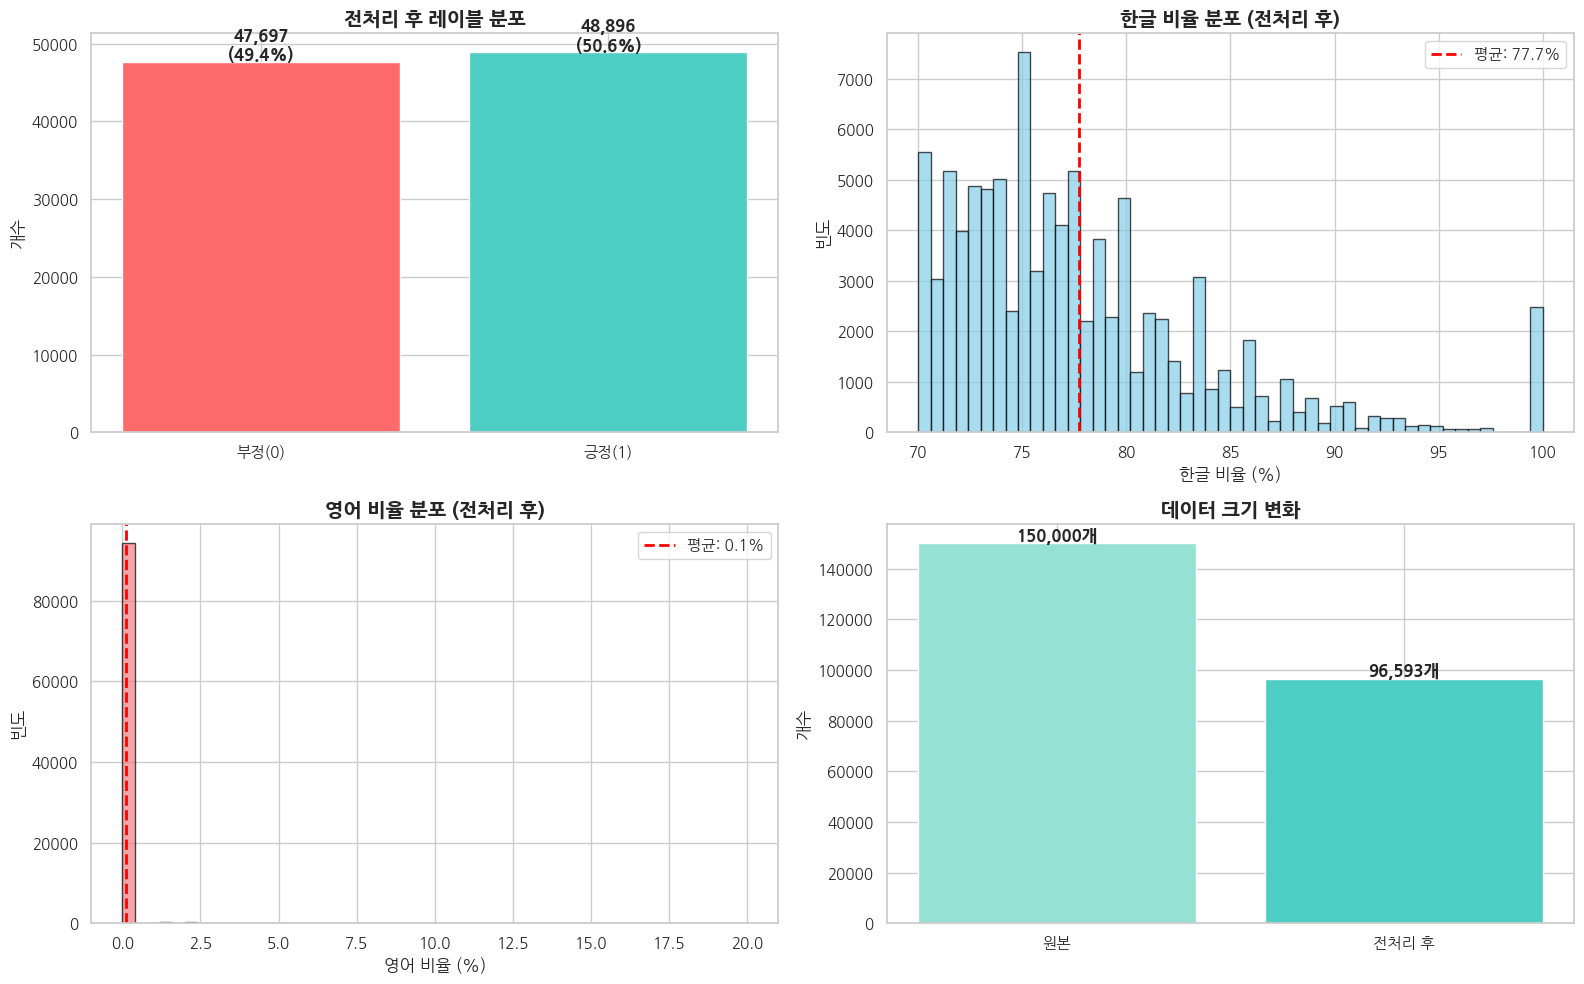


✅ 전처리 예시 (랜덤 10개)

[긍정] 한글:80.0% 영어: 0.0%
    간만에 여아의 매력을 느낀다

[부정] 한글:80.0% 영어: 0.0%
    엉덩이아프고 졸려서 뛰쳐나왔다. 다들나가더라.

[긍정] 한글:70.8% 영어: 0.0%
    무엇을 보든 상상 그 이상을 보게될 것이다.

[부정] 한글:73.8% 영어: 0.0%
    여친이 개같은 년인거다. 내가 아담 샌들러 였다면 그년을 패죽이고 헤어졌을거다. 보는 사람이 성질 뻗치는 영화

[부정] 한글:72.2% 영어: 0.0%
    진짜 재미없다. 완전 저질 지루함

[부정] 한글:73.3% 영어: 0.0%
    재밌었는데 살인부터 완전히 엉켜버림.. 감독이 멍한 듯

[긍정] 한글:75.0% 영어: 0.0%
    으ㅜㅜ가슴이미어진다 해피엔딩인데도..

[긍정] 한글:84.6% 영어: 0.0%
    내단짝친구지선이화이팅!!

[부정] 한글:81.4% 영어: 0.0%
    완전 허접쓰레기 영화인데 부루스윌리스가 주연하는 바람에 한국인들 평점은 높구나

[긍정] 한글:90.0% 영어: 0.0%
    옛날에봤는데최고다ㅋ

💾 저장 완료
   /content/work/bert_pretrain/nsmc/ratings_train_cleaned_kr70.txt
   /content/work/bert_pretrain/nsmc/ratings_test_cleaned_kr70.txt

🎉 전처리 완료!

💡 다음 단계:
   1. 토크나이저 선택 (klue/bert-base, beomi/kcbert-base 등)
   2. max_length=128 권장
   3. batch_size=16 or 32
   4. 파인튜닝 시작!


In [33]:
# ============================================
# NSMC 데이터 전처리 (언어 비율 필터링 포함)
# ============================================

import pandas as pd
import re
import matplotlib.pyplot as plt

# ============================================
# 설정값
# ============================================
STRATEGY = 'B'  # 특수문자 전처리 전략 (A, B, C)

# 언어 비율 필터링 기준
KOREAN_MIN_RATIO = 0.70   # 한글 최소 비율 (70%)
ENGLISH_MAX_RATIO = 0.20  # 영어 최대 비율 (20%)

print("="*70)
print(f"NSMC 데이터 전처리 (전략 {STRATEGY} + 언어 필터링)")
print("="*70)
print()
print(f"🎯 언어 필터링 기준:")
print(f"   한글 최소 비율: {KOREAN_MIN_RATIO*100:.0f}%")
print(f"   영어 최대 비율: {ENGLISH_MAX_RATIO*100:.0f}%")
print("="*70)
print()

# ============================================
# 데이터 로드
# ============================================
train_df = pd.read_csv('/content/work/bert_pretrain/nsmc/ratings_train.txt', sep='\t')
test_df = pd.read_csv('/content/work/bert_pretrain/nsmc/ratings_test.txt', sep='\t')

original_train_size = len(train_df)
original_test_size = len(test_df)

print(f"📂 원본 데이터:")
print(f"   학습: {len(train_df):,}개")
print(f"   테스트: {len(test_df):,}개")
print()

# ============================================
# 언어 비율 계산 함수
# ============================================

def calculate_language_ratio(text):
    """언어별 비율 계산"""
    text = str(text)
    total = len(text)

    if total == 0:
        return {'korean': 0, 'english': 0}

    korean = len(re.findall(r'[가-힣]', text))
    english = len(re.findall(r'[a-zA-Z]', text))

    return {
        'korean': korean / total,
        'english': english / total
    }

# ============================================
# 특수문자 전처리 함수들
# ============================================

def clean_text_strategy_A(text):
    """전략 A: 보수적"""
    text = str(text)
    text = re.sub(r'[@#$%^&*_+=|\\`~<>]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def clean_text_strategy_B(text):
    """전략 B: 중도적 (권장)"""
    text = str(text)

    # URL, 이메일 제거
    text = re.sub(r'http[s]?://\S+', '', text)
    text = re.sub(r'\S+@\S+\.\S+', '', text)

    # 의미 없는 특수기호 제거
    text = re.sub(r'[@#$%^&*_+=|\\`~<>{}[\]]', ' ', text)

    # 연속 특수문자 축약
    text = re.sub(r'!{3,}', '!!', text)
    text = re.sub(r'\?{3,}', '??', text)
    text = re.sub(r'\.{4,}', '...', text)
    text = re.sub(r',{2,}', ',', text)
    text = re.sub(r'~{2,}', '~', text)

    # 빈 괄호 제거
    text = re.sub(r'\(\s*\)', '', text)

    # 공백 정리
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def clean_text_strategy_C(text):
    """전략 C: 공격적"""
    text = str(text)
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# 전략 선택
clean_functions = {'A': clean_text_strategy_A, 'B': clean_text_strategy_B, 'C': clean_text_strategy_C}
clean_function = clean_functions[STRATEGY]

# ============================================
# 전처리 시작
# ============================================

def preprocess_dataframe(df, name="데이터"):
    """데이터프레임 전처리"""

    print(f"🔧 {name} 전처리 시작")
    print("-"*70)

    initial_size = len(df)

    # 0. id 열 삭제 (학습에 불필요)
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
        print(f"  0. id 열 삭제 완료")

    # 1. 결측치 제거
    step1 = len(df)
    df = df.dropna(subset=['document'])
    print(f"  1. 결측치 제거: -{step1 - len(df):,}개 (현재: {len(df):,}개)")

    # 2. 특수문자 정규화
    df['document'] = df['document'].apply(clean_function)
    print(f"  2. 특수문자 정규화 완료")

    # 3. 빈 문자열 제거
    step3 = len(df)
    df = df[df['document'].str.strip() != '']
    print(f"  3. 빈 문자열 제거: -{step3 - len(df):,}개 (현재: {len(df):,}개)")

    # 4. 언어 비율 계산
    print(f"  4. 언어 비율 계산 중...", end='')
    lang_ratios = df['document'].apply(calculate_language_ratio)
    df['korean_ratio'] = lang_ratios.apply(lambda x: x['korean'])
    df['english_ratio'] = lang_ratios.apply(lambda x: x['english'])
    print(" 완료")

    # 5. 언어 비율 필터링
    step5 = len(df)
    df = df[
        (df['korean_ratio'] >= KOREAN_MIN_RATIO) &
        (df['english_ratio'] <= ENGLISH_MAX_RATIO)
    ]
    removed = step5 - len(df)
    print(f"  5. 언어 비율 필터링: -{removed:,}개 (현재: {len(df):,}개)")
    print(f"     → 한글 < {KOREAN_MIN_RATIO*100:.0f}% 또는 영어 > {ENGLISH_MAX_RATIO*100:.0f}% 제거")

    # 6. 한글이 없는 리뷰 제거
    step6 = len(df)
    df = df[df['document'].str.contains('[가-힣]', regex=True)]
    print(f"  6. 한글 없는 리뷰 제거: -{step6 - len(df):,}개 (현재: {len(df):,}개)")

    # 7. 너무 짧은 리뷰 제거 (3자 이하)
    step7 = len(df)
    df = df[df['document'].str.len() > 3]
    print(f"  7. 3자 이하 제거: -{step7 - len(df):,}개 (현재: {len(df):,}개)")

    # 8. 의미 있는 한글 확인 (한글 3자 이상)
    step8 = len(df)
    df = df[df['document'].apply(lambda x: len(re.findall('[가-힣]', str(x))) >= 3)]
    print(f"  8. 의미 없는 리뷰 제거: -{step8 - len(df):,}개 (현재: {len(df):,}개)")

    # 9. 중복 제거
    step9 = len(df)
    df = df.drop_duplicates(subset=['document'], keep='first')
    print(f"  9. 중복 제거: -{step9 - len(df):,}개 (현재: {len(df):,}개)")

    # 10. 인덱스 재설정
    df = df.reset_index(drop=True)

    print()
    print(f"  ✅ {name} 전처리 완료")
    print(f"     전체 제거: {initial_size - len(df):,}개 ({(initial_size - len(df))/initial_size*100:.2f}%)")
    print(f"     최종 크기: {len(df):,}개")
    print()

    return df

# 전처리 실행
train_df = preprocess_dataframe(train_df, "학습 데이터")
test_df = preprocess_dataframe(test_df, "테스트 데이터")

# ============================================
# 결과 통계
# ============================================
print("="*70)
print("📊 전처리 결과 요약")
print("="*70)
print()

print("📌 데이터 크기 변화")
print(f"   학습: {original_train_size:,} → {len(train_df):,} "
      f"(-{original_train_size - len(train_df):,}, {(1-len(train_df)/original_train_size)*100:.1f}% 감소)")
print(f"   테스트: {original_test_size:,} → {len(test_df):,} "
      f"(-{original_test_size - len(test_df):,}, {(1-len(test_df)/original_test_size)*100:.1f}% 감소)")
print()

print("📌 레이블 분포")
train_label_dist = train_df['label'].value_counts().sort_index()
print(f"   부정(0): {train_label_dist[0]:,}개 ({train_label_dist[0]/len(train_df)*100:.2f}%)")
print(f"   긍정(1): {train_label_dist[1]:,}개 ({train_label_dist[1]/len(train_df)*100:.2f}%)")
print(f"   클래스 균형도: {min(train_label_dist)/max(train_label_dist)*100:.2f}%")
print()

print("📌 언어 비율 통계 (전처리 후)")
print(f"   평균 한글 비율: {train_df['korean_ratio'].mean()*100:.2f}%")
print(f"   평균 영어 비율: {train_df['english_ratio'].mean()*100:.2f}%")
print(f"   한글 100%: {(train_df['english_ratio']==0).sum():,}개 "
      f"({(train_df['english_ratio']==0).sum()/len(train_df)*100:.2f}%)")
print()

print("📌 텍스트 길이 통계")
train_df['char_length'] = train_df['document'].str.len()
print(f"   평균: {train_df['char_length'].mean():.1f}자")
print(f"   중앙값: {train_df['char_length'].median():.0f}자")
print(f"   최소: {train_df['char_length'].min()}자")
print(f"   최대: {train_df['char_length'].max()}자")
print()

# ============================================
# 시각화
# ============================================
print("📊 시각화 생성 중...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. 레이블 분포
axes[0, 0].bar(['부정(0)', '긍정(1)'], train_label_dist.values, color=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_title('전처리 후 레이블 분포', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('개수')
for i, v in enumerate(train_label_dist.values):
    axes[0, 0].text(i, v + 200, f'{v:,}\n({v/len(train_df)*100:.1f}%)',
                    ha='center', fontweight='bold')

# 2. 한글 비율 분포
axes[0, 1].hist(train_df['korean_ratio']*100, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(train_df['korean_ratio'].mean()*100, color='red', linestyle='--',
                   label=f'평균: {train_df["korean_ratio"].mean()*100:.1f}%', linewidth=2)
axes[0, 1].set_title('한글 비율 분포 (전처리 후)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('한글 비율 (%)')
axes[0, 1].set_ylabel('빈도')
axes[0, 1].legend()

# 3. 영어 비율 분포
axes[1, 0].hist(train_df['english_ratio']*100, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(train_df['english_ratio'].mean()*100, color='red', linestyle='--',
                   label=f'평균: {train_df["english_ratio"].mean()*100:.1f}%', linewidth=2)
axes[1, 0].set_title('영어 비율 분포 (전처리 후)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('영어 비율 (%)')
axes[1, 0].set_ylabel('빈도')
axes[1, 0].legend()

# 4. 데이터 크기 비교
categories = ['원본', '전처리 후']
sizes = [original_train_size, len(train_df)]
colors = ['#95E1D3', '#4ECDC4']
axes[1, 1].bar(categories, sizes, color=colors)
axes[1, 1].set_title('데이터 크기 변화', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('개수')
for i, size in enumerate(sizes):
    axes[1, 1].text(i, size + 1000, f'{size:,}개', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
print()

# ============================================
# 예시 확인
# ============================================
print("="*70)
print("✅ 전처리 예시 (랜덤 10개)")
print("="*70)
print()

for idx, row in train_df.sample(10, random_state=42).iterrows():
    label = "긍정" if row['label'] == 1 else "부정"
    print(f"[{label}] 한글:{row['korean_ratio']*100:4.1f}% 영어:{row['english_ratio']*100:4.1f}%")
    print(f"    {row['document'][:70]}")
    print()

# ============================================
# 저장
# ============================================
output_dir = '/content/work/bert_pretrain/nsmc/'
train_output = output_dir + f'ratings_train_cleaned_kr{int(KOREAN_MIN_RATIO*100)}.txt'
test_output = output_dir + f'ratings_test_cleaned_kr{int(KOREAN_MIN_RATIO*100)}.txt'

# document와 label만 저장 (id는 이미 삭제됨, 분석용 컬럼 제외)
train_df[['document', 'label']].to_csv(train_output, sep='\t', index=False)
test_df[['document', 'label']].to_csv(test_output, sep='\t', index=False)

print("="*70)
print("💾 저장 완료")
print("="*70)
print(f"   {train_output}")
print(f"   {test_output}")
print()

print("="*70)
print("🎉 전처리 완료!")
print("="*70)
print()
print("💡 다음 단계:")
print("   1. 토크나이저 선택 (klue/bert-base, beomi/kcbert-base 등)")
print("   2. max_length=128 권장")
print("   3. batch_size=16 or 32")
print("   4. 파인튜닝 시작!")

# **토크나이징**

🔧 NSMC 데이터 토크나이징 (klue/bert-base)

📂 1단계: 전처리된 데이터 로드
----------------------------------------------------------------------
✅ 학습 데이터: 96,593개
✅ 테스트 데이터: 32,462개

샘플 데이터 확인:
                                            document  label
0                   흠...포스터보고 초딩영화줄...오버연기조차 가볍지 않구나      1
1                                  너무재밓었다그래서보는것을추천한다      0
2  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

🔤 2단계: klue/bert-base 토크나이저 로드
----------------------------------------------------------------------
✅ 토크나이저 로드 완료
   모델: klue/bert-base
   어휘 크기: 32,000개

📌 토크나이저 특수 토큰:
   [PAD] (패딩): [PAD] (ID: 0)
   [UNK] (미등록어): [UNK] (ID: 1)
   [CLS] (시작): [CLS] (ID: 2)
   [SEP] (종료): [SEP] (ID: 3)
   [MASK] (마스킹): [MASK] (ID: 4)

🧪 3단계: 토크나이징 테스트
----------------------------------------------------------------------
원본 문장: 이 영화 정말 재미있어요!

토큰 분리: ['이', '영화', '정말', '재미있', '##어요', '!']

토큰 ID: [2, 1504, 3771, 3944, 6001, 10283, 5, 3]

디코딩: [CLS] 이 영화 정말 재미있어요! [SEP]

전체 인코딩 결과:
  input_ids:

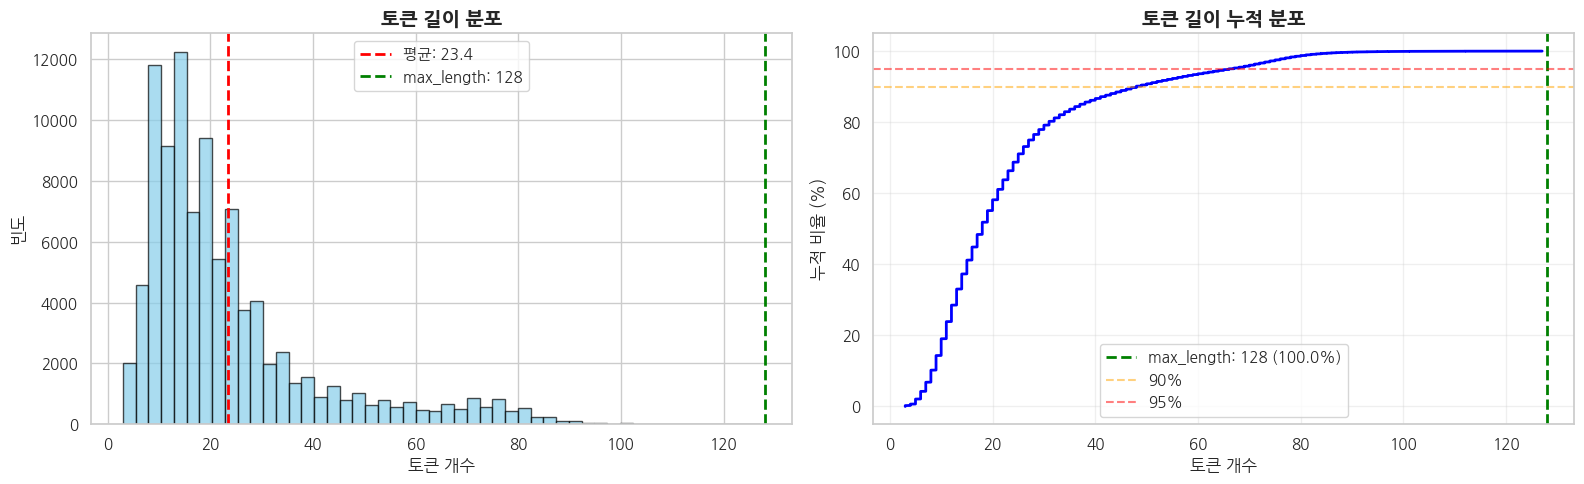


⚙️  5단계: 토크나이징 함수 정의
----------------------------------------------------------------------
✅ 토크나이징 함수 정의 완료

함수 설명:
  - padding='max_length': 모든 시퀀스를 동일한 길이로
  - truncation=True: 긴 문장은 자르기
  - max_length=128: 최대 128 토큰

🔄 6단계: Hugging Face Dataset으로 변환
----------------------------------------------------------------------
✅ Dataset 변환 완료
DatasetDict({
    train: Dataset({
        features: ['document', 'label'],
        num_rows: 96593
    })
    test: Dataset({
        features: ['document', 'label'],
        num_rows: 32462
    })
})

🚀 7단계: 전체 데이터셋 토크나이징
----------------------------------------------------------------------
토크나이징 시작... (시간이 좀 걸립니다)



토크나이징 중:   0%|          | 0/96593 [00:00<?, ? examples/s]

토크나이징 중:   0%|          | 0/32462 [00:00<?, ? examples/s]


✅ 토크나이징 완료!
DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 96593
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 32462
    })
})

🔍 8단계: 토크나이징 결과 확인
----------------------------------------------------------------------

샘플 #0 확인:
  레이블: 1 (긍정)

  input_ids (길이: 128):
    [2, 1963, 18, 18, 18, 11811, 2178, 2088, 28883, 16516, 2776, 18, 18, 18, 10737, 2156, 2015, 2446, 2232, 6758]... (처음 20개만)

  attention_mask (길이: 128):
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]... (처음 20개만)

  디코딩 (특수 토큰 포함):
    [CLS] 흠... 포스터보고 초딩영화줄... 오버연기조차 가볍지 않구나 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]...

  디코딩 (특수 토큰 제외):
    흠... 포스터보고 초딩영화줄... 오버연기조차 가볍지 않구나...


📝 추가 샘플 확인 (랜덤 5개)

1. [긍정] (실제 토큰: 19개)
   안타깝다 누군가에겐 사랑의 축복 누군가에겐 더 없을 저주 다이아몬드.

2. [부정] (실제 토큰: 17개)
   이것을 만들고 난 후, 감독은 현재 실종상태이다.

3. [부정] (실

Saving the dataset (0/1 shards):   0%|          | 0/96593 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/32462 [00:00<?, ? examples/s]

✅ 저장 완료: /content/work/bert_pretrain/nsmc/tokenized_data

이후 로드 방법:
  from datasets import load_from_disk
  tokenized_dataset = load_from_disk('/content/work/bert_pretrain/nsmc/tokenized_data')

🎉 토크나이징 완료!

✅ 준비된 데이터:
   학습: 96,593개
   테스트: 32,462개

✅ 데이터 형식:
   input_ids: 128차원 정수 리스트
   attention_mask: 128차원 이진 리스트
   label: 0(부정) 또는 1(긍정)

💡 다음 단계: 파인튜닝
   다음 코드를 실행하세요:

   from transformers import (
       AutoModelForSequenceClassification,
       TrainingArguments,
       Trainer
   )
   
   # 모델 로드
   model = AutoModelForSequenceClassification.from_pretrained(
       "klue/bert-base",
       num_labels=2
   )
   
   # TrainingArguments, Trainer 설정 후 학습
   trainer.train()




In [34]:
# ============================================
# NSMC 데이터 토크나이징 (klue/bert-base)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
from datasets import Dataset, DatasetDict
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("🔧 NSMC 데이터 토크나이징 (klue/bert-base)")
print("="*70)
print()

# ============================================
# 1. 전처리된 데이터 로드
# ============================================
print("📂 1단계: 전처리된 데이터 로드")
print("-"*70)

# 전처리된 파일 경로 (실제 저장된 파일명에 맞게 수정)
train_path = '/content/work/bert_pretrain/nsmc/ratings_train_cleaned_kr70.txt'
test_path = '/content/work/bert_pretrain/nsmc/ratings_test_cleaned_kr70.txt'

train_df = pd.read_csv(train_path, sep='\t')
test_df = pd.read_csv(test_path, sep='\t')

print(f"✅ 학습 데이터: {len(train_df):,}개")
print(f"✅ 테스트 데이터: {len(test_df):,}개")
print()

print("샘플 데이터 확인:")
print(train_df.head(3))
print()

# ============================================
# 2. 토크나이저 로드
# ============================================
print("="*70)
print("🔤 2단계: klue/bert-base 토크나이저 로드")
print("-"*70)

# klue/bert-base 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

print(f"✅ 토크나이저 로드 완료")
print(f"   모델: klue/bert-base")
print(f"   어휘 크기: {tokenizer.vocab_size:,}개")
print()

# 토크나이저 기본 정보
print("📌 토크나이저 특수 토큰:")
print(f"   [PAD] (패딩): {tokenizer.pad_token} (ID: {tokenizer.pad_token_id})")
print(f"   [UNK] (미등록어): {tokenizer.unk_token} (ID: {tokenizer.unk_token_id})")
print(f"   [CLS] (시작): {tokenizer.cls_token} (ID: {tokenizer.cls_token_id})")
print(f"   [SEP] (종료): {tokenizer.sep_token} (ID: {tokenizer.sep_token_id})")
print(f"   [MASK] (마스킹): {tokenizer.mask_token} (ID: {tokenizer.mask_token_id})")
print()

# ============================================
# 3. 토크나이징 테스트
# ============================================
print("="*70)
print("🧪 3단계: 토크나이징 테스트")
print("-"*70)

# 예시 문장으로 테스트
test_sentence = "이 영화 정말 재미있어요!"
print(f"원본 문장: {test_sentence}")
print()

# 토크나이징
tokens = tokenizer.tokenize(test_sentence)
print(f"토큰 분리: {tokens}")
print()

# 인코딩 (ID 변환)
encoded = tokenizer.encode(test_sentence)
print(f"토큰 ID: {encoded}")
print()

# 디코딩 (다시 문장으로)
decoded = tokenizer.decode(encoded)
print(f"디코딩: {decoded}")
print()

# 전체 정보 확인
full_encoding = tokenizer(
    test_sentence,
    padding='max_length',
    truncation=True,
    max_length=20,
    return_tensors=None
)
print("전체 인코딩 결과:")
for key, value in full_encoding.items():
    print(f"  {key}: {value}")
print()

# ============================================
# 4. 적절한 max_length 결정
# ============================================
print("="*70)
print("📏 4단계: 적절한 max_length 결정")
print("-"*70)

# 모든 문장을 토크나이징하여 길이 확인
print("전체 데이터 토큰 길이 계산 중... (시간이 좀 걸립니다)")

token_lengths = []
for text in train_df['document']:
    tokens = tokenizer.tokenize(str(text))
    token_lengths.append(len(tokens) + 2)  # +2는 [CLS], [SEP] 토큰

token_lengths = np.array(token_lengths)

print()
print("📊 토큰 길이 통계:")
print(f"   평균: {token_lengths.mean():.1f}")
print(f"   중앙값: {np.median(token_lengths):.0f}")
print(f"   최소: {token_lengths.min()}")
print(f"   최대: {token_lengths.max()}")
print(f"   표준편차: {token_lengths.std():.1f}")
print()

# 백분위수 계산
percentiles = [50, 75, 90, 95, 99]
print("📊 백분위수:")
for p in percentiles:
    value = np.percentile(token_lengths, p)
    covered = (token_lengths <= value).sum() / len(token_lengths) * 100
    print(f"   {p}%: {value:.0f} 토큰 (전체의 {covered:.1f}% 커버)")
print()

# max_length 권장
max_length_90 = int(np.percentile(token_lengths, 90))
max_length_95 = int(np.percentile(token_lengths, 95))

print("💡 max_length 권장값:")
print(f"   보수적 (90% 커버): {max_length_90}")
print(f"   표준적 (95% 커버): {max_length_95}")
print(f"   안전 (거의 모두 커버): 128")
print()

# 최종 max_length 설정
MAX_LENGTH = 128
print(f"🎯 선택된 max_length: {MAX_LENGTH}")
covered_pct = (token_lengths <= MAX_LENGTH).sum() / len(token_lengths) * 100
print(f"   이 길이로 커버되는 데이터: {covered_pct:.2f}%")
print()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 토큰 길이 히스토그램
axes[0].hist(token_lengths, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(token_lengths.mean(), color='red', linestyle='--',
                label=f'평균: {token_lengths.mean():.1f}', linewidth=2)
axes[0].axvline(MAX_LENGTH, color='green', linestyle='--',
                label=f'max_length: {MAX_LENGTH}', linewidth=2)
axes[0].set_title('토큰 길이 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('토큰 개수')
axes[0].set_ylabel('빈도')
axes[0].legend()

# 누적 분포
sorted_lengths = np.sort(token_lengths)
cumulative = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths) * 100
axes[1].plot(sorted_lengths, cumulative, color='blue', linewidth=2)
axes[1].axvline(MAX_LENGTH, color='green', linestyle='--',
                label=f'max_length: {MAX_LENGTH} ({covered_pct:.1f}%)', linewidth=2)
axes[1].axhline(90, color='orange', linestyle='--', alpha=0.5, label='90%')
axes[1].axhline(95, color='red', linestyle='--', alpha=0.5, label='95%')
axes[1].set_title('토큰 길이 누적 분포', fontsize=14, fontweight='bold')
axes[1].set_xlabel('토큰 개수')
axes[1].set_ylabel('누적 비율 (%)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print()

# ============================================
# 5. 토크나이징 함수 정의
# ============================================
print("="*70)
print("⚙️  5단계: 토크나이징 함수 정의")
print("-"*70)

def tokenize_function(examples):
    """
    배치 단위로 텍스트를 토크나이징

    Args:
        examples: 'document' 키를 포함한 딕셔너리

    Returns:
        input_ids, attention_mask, token_type_ids를 포함한 딕셔너리
    """
    return tokenizer(
        examples['document'],
        padding='max_length',      # 모든 시퀀스를 max_length로 패딩
        truncation=True,            # max_length를 초과하면 자르기
        max_length=MAX_LENGTH,      # 최대 길이
        return_tensors=None         # 리스트 형태로 반환
    )

print("✅ 토크나이징 함수 정의 완료")
print()
print("함수 설명:")
print("  - padding='max_length': 모든 시퀀스를 동일한 길이로")
print("  - truncation=True: 긴 문장은 자르기")
print(f"  - max_length={MAX_LENGTH}: 최대 {MAX_LENGTH} 토큰")
print()

# ============================================
# 6. Hugging Face Dataset으로 변환
# ============================================
print("="*70)
print("🔄 6단계: Hugging Face Dataset으로 변환")
print("-"*70)

# pandas DataFrame을 Hugging Face Dataset으로 변환
train_dataset = Dataset.from_pandas(train_df[['document', 'label']])
test_dataset = Dataset.from_pandas(test_df[['document', 'label']])

# DatasetDict 생성
dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

print("✅ Dataset 변환 완료")
print(dataset)
print()

# ============================================
# 7. 토크나이징 적용
# ============================================
print("="*70)
print("🚀 7단계: 전체 데이터셋 토크나이징")
print("-"*70)

print("토크나이징 시작... (시간이 좀 걸립니다)")
print()

# 토크나이징 적용 (배치 처리로 빠르게)
tokenized_dataset = dataset.map(
    tokenize_function,
    batched=True,                    # 배치 단위로 처리 (속도 향상)
    batch_size=1000,                 # 배치 크기
    remove_columns=['document'],     # 원본 텍스트 컬럼 제거
    desc="토크나이징 중"              # 진행 상황 표시
)

print()
print("✅ 토크나이징 완료!")
print(tokenized_dataset)
print()

# ============================================
# 8. 토크나이징 결과 확인
# ============================================
print("="*70)
print("🔍 8단계: 토크나이징 결과 확인")
print("-"*70)

# 첫 번째 샘플 확인
sample_idx = 0
sample = tokenized_dataset['train'][sample_idx]

print(f"\n샘플 #{sample_idx} 확인:")
print(f"  레이블: {sample['label']} ({'긍정' if sample['label'] == 1 else '부정'})")
print()

print(f"  input_ids (길이: {len(sample['input_ids'])}):")
print(f"    {sample['input_ids'][:20]}... (처음 20개만)")
print()

print(f"  attention_mask (길이: {len(sample['attention_mask'])}):")
print(f"    {sample['attention_mask'][:20]}... (처음 20개만)")
print()

# 디코딩하여 원본 텍스트 확인
decoded_text = tokenizer.decode(sample['input_ids'], skip_special_tokens=False)
decoded_text_clean = tokenizer.decode(sample['input_ids'], skip_special_tokens=True)

print("  디코딩 (특수 토큰 포함):")
print(f"    {decoded_text[:100]}...")
print()

print("  디코딩 (특수 토큰 제외):")
print(f"    {decoded_text_clean[:100]}...")
print()

# 여러 샘플 확인
print("\n" + "="*70)
print("📝 추가 샘플 확인 (랜덤 5개)")
print("="*70)
print()

import random
random.seed(42)
sample_indices = random.sample(range(len(tokenized_dataset['train'])), 5)

for i, idx in enumerate(sample_indices, 1):
    sample = tokenized_dataset['train'][idx]
    label = "긍정" if sample['label'] == 1 else "부정"
    text = tokenizer.decode(sample['input_ids'], skip_special_tokens=True)

    # 실제 토큰 개수 (패딩 제외)
    actual_tokens = sum(sample['attention_mask'])

    print(f"{i}. [{label}] (실제 토큰: {actual_tokens}개)")
    print(f"   {text[:80]}")
    print()

# ============================================
# 9. 데이터셋 통계
# ============================================
print("="*70)
print("📊 9단계: 토크나이징된 데이터셋 통계")
print("="*70)
print()

# 실제 토큰 길이 계산 (패딩 제외)
actual_lengths = []
for sample in tokenized_dataset['train']:
    actual_length = sum(sample['attention_mask'])
    actual_lengths.append(actual_length)

actual_lengths = np.array(actual_lengths)

print("토큰 길이 통계 (패딩 제외):")
print(f"  평균: {actual_lengths.mean():.1f}")
print(f"  중앙값: {np.median(actual_lengths):.0f}")
print(f"  최소: {actual_lengths.min()}")
print(f"  최대: {actual_lengths.max()}")
print()

# 패딩 비율
padding_ratio = 1 - (actual_lengths.mean() / MAX_LENGTH)
print(f"평균 패딩 비율: {padding_ratio*100:.1f}%")
print(f"  → 각 샘플이 평균적으로 {padding_ratio*100:.1f}%가 패딩")
print()

# 레이블 분포
train_labels = [sample['label'] for sample in tokenized_dataset['train']]
label_counts = pd.Series(train_labels).value_counts().sort_index()

print("레이블 분포:")
print(f"  부정(0): {label_counts[0]:,}개 ({label_counts[0]/len(train_labels)*100:.2f}%)")
print(f"  긍정(1): {label_counts[1]:,}개 ({label_counts[1]/len(train_labels)*100:.2f}%)")
print()

# ============================================
# 10. 데이터셋 저장 (선택사항)
# ============================================
print("="*70)
print("💾 10단계: 토크나이징된 데이터셋 저장")
print("-"*70)

# 저장 경로
save_dir = '/content/work/bert_pretrain/nsmc/tokenized_data'

# 디스크에 저장 (나중에 빠르게 로드 가능)
tokenized_dataset.save_to_disk(save_dir)

print(f"✅ 저장 완료: {save_dir}")
print()
print("이후 로드 방법:")
print("  from datasets import load_from_disk")
print(f"  tokenized_dataset = load_from_disk('{save_dir}')")
print()

# ============================================
# 11. 파인튜닝 준비 완료
# ============================================
print("="*70)
print("🎉 토크나이징 완료!")
print("="*70)
print()

print("✅ 준비된 데이터:")
print(f"   학습: {len(tokenized_dataset['train']):,}개")
print(f"   테스트: {len(tokenized_dataset['test']):,}개")
print()

print("✅ 데이터 형식:")
print(f"   input_ids: {MAX_LENGTH}차원 정수 리스트")
print(f"   attention_mask: {MAX_LENGTH}차원 이진 리스트")
print(f"   label: 0(부정) 또는 1(긍정)")
print()

print("💡 다음 단계: 파인튜닝")
print("   다음 코드를 실행하세요:")
print("""
   from transformers import (
       AutoModelForSequenceClassification,
       TrainingArguments,
       Trainer
   )

   # 모델 로드
   model = AutoModelForSequenceClassification.from_pretrained(
       "klue/bert-base",
       num_labels=2
   )

   # TrainingArguments, Trainer 설정 후 학습
   trainer.train()
""")
print()

print("="*70)

# **파인튜닝 준비**

In [40]:
# ============================================
# NSMC 파인튜닝 준비
# ============================================

import torch
import numpy as np
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
from datasets import load_from_disk
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

MODEL_NAME = "klue/bert-base"
TOKENIZED_DATA_PATH = '/content/work/bert_pretrain/nsmc/tokenized_data'  # 토크나이징된 데이터 경로
MODEL_SAVE_PATH = '/content/work/bert_pretrain/nsmc/nsmc_finetuned_model'

print("="*70)
print("🚀 NSMC 파인튜닝 준비")
print("="*70)
print()

🚀 NSMC 파인튜닝 준비 및 config



# **Data loading**

In [41]:
# ============================================
# 토크나이징된 데이터셋 로드
# ============================================
print("📂 1단계: 토크나이징된 데이터셋 로드")
print("-"*70)

tokenized_dataset = load_from_disk(TOKENIZED_DATA_PATH)

print(f"✅ 데이터셋 로드 완료")
print(tokenized_dataset)
print()
print(f"학습 데이터: {len(tokenized_dataset['train']):,}개")
print(f"테스트 데이터: {len(tokenized_dataset['test']):,}개")
print()

# 샘플 확인
print("샘플 데이터 확인:")
sample = tokenized_dataset['train'][0]
print(f"  Keys: {sample.keys()}")
print(f"  Label: {sample['label']}")
print(f"  Input IDs 길이: {len(sample['input_ids'])}")
print(f"  Attention Mask 길이: {len(sample['attention_mask'])}")
print()

📂 1단계: 토크나이징된 데이터셋 로드
----------------------------------------------------------------------
✅ 데이터셋 로드 완료
DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 96593
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 32462
    })
})

학습 데이터: 96,593개
테스트 데이터: 32,462개

샘플 데이터 확인:
  Keys: dict_keys(['label', 'input_ids', 'token_type_ids', 'attention_mask'])
  Label: 1
  Input IDs 길이: 128
  Attention Mask 길이: 128



# **모델 정의**


**실험 # 1은 순서대로 진행**
    
    
    블록 1 → 블록 2 → 블록 3 → 블록 4 → 블록 5 → 블록 6 → 블록 7


**실험 # 2는 Bucketing 도입 추가 블럭 진행**
    
    실험1을 다 진행 후 → 블록 3-B → 블록 4-B → 블록 5-B → 블록 6-B


In [49]:
# ============================================
# 블록 1 (대안): 상위 레이어만 파인튜닝
# ============================================

import torch
from transformers import AutoModelForSequenceClassification

print("="*70)
print("🤖 블록 1: 모델 로드 및 상위 레이어 파인튜닝")
print("="*70)
print()

MODEL_NAME = "klue/bert-base"

model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2,
    id2label={0: "부정", 1: "긍정"},
    label2id={"부정": 0, "긍정": 1}
)

print(f"✅ 모델 로드 완료: {MODEL_NAME}")
print()

# ============================================
# 상위 6개 레이어 + 분류기 학습
# ============================================
print("🎯 파인튜닝 전략: 상위 6개 레이어 + 분류기")
print("-"*70)

# 모든 BERT 레이어 freeze
for param in model.bert.parameters():
    param.requires_grad = False

# 상위 6개 레이어만 unfreeze (레이어 6, 7, 8, 9, 10, 11)
num_layers_to_finetune = 6
total_layers = 12  # klue/bert-base는 12개 레이어

for i in range(total_layers - num_layers_to_finetune, total_layers):
    for param in model.bert.encoder.layer[i].parameters():
        param.requires_grad = True
    print(f"   Layer {i}: ✅ 학습")

# 분류기는 항상 학습
for param in model.classifier.parameters():
    param.requires_grad = True

print(f"   Classifier: ✅ 학습")
print()

# 파라미터 통계
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
frozen_params = total_params - trainable_params

print("📊 파라미터 통계:")
print(f"   전체 파라미터:   {total_params:,}개")
print(f"   학습 가능:       {trainable_params:,}개 ({trainable_params/total_params*100:.1f}%)")
print(f"   Freeze:         {frozen_params:,}개 ({frozen_params/total_params*100:.1f}%)")
print()

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"💻 사용 디바이스: {device}")
if device == "cuda":
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
print()

print("💡 이 전략의 장점:")
print("   • 성능: 88-91% 예상 (90% 달성 가능)")
print("   • 속도: Full fine-tuning 대비 약 1.5-2배 빠름")
print("   • 메모리: 적당한 메모리 사용")
print()

print("="*70)
print("✅ 블록 1 완료!")
print("="*70)

🤖 블록 1: 모델 로드 및 상위 레이어 파인튜닝



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ 모델 로드 완료: klue/bert-base

🎯 파인튜닝 전략: 상위 6개 레이어 + 분류기
----------------------------------------------------------------------
   Layer 6: ✅ 학습
   Layer 7: ✅ 학습
   Layer 8: ✅ 학습
   Layer 9: ✅ 학습
   Layer 10: ✅ 학습
   Layer 11: ✅ 학습
   Classifier: ✅ 학습

📊 파라미터 통계:
   전체 파라미터:   110,618,882개
   학습 가능:       42,528,770개 (38.4%)
   Freeze:         68,090,112개 (61.6%)

💻 사용 디바이스: cuda
   GPU: Tesla T4

💡 이 전략의 장점:
   • 성능: 88-91% 예상 (90% 달성 가능)
   • 속도: Full fine-tuning 대비 약 1.5-2배 빠름
   • 메모리: 적당한 메모리 사용

✅ 블록 1 완료!


In [43]:
# ============================================
# 블록 2: 평가 지표 정의
# ============================================

import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

print("="*70)
print("📊 블록 2: 평가 지표 정의")
print("="*70)
print()

def compute_metrics(eval_pred):
    """
    모델 성능 평가를 위한 지표 계산

    Args:
        eval_pred: (logits, labels) 튜플

    Returns:
        dict: accuracy, f1, precision, recall
    """
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Accuracy
    accuracy = accuracy_score(labels, predictions)

    # Precision, Recall, F1 (binary classification)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='binary'
    )

    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

print("✅ 평가 지표 함수 정의 완료")
print()
print("📌 사용할 평가 지표:")
print("   • Accuracy (정확도): 전체 예측 중 맞춘 비율")
print("   • F1 Score: 정밀도와 재현율의 조화평균")
print("   • Precision (정밀도): 긍정 예측 중 실제 긍정 비율")
print("   • Recall (재현율): 실제 긍정 중 올바르게 예측한 비율")
print()

print("="*70)
print("✅ 블록 2 완료!")
print("="*70)

📊 블록 2: 평가 지표 정의

✅ 평가 지표 함수 정의 완료

📌 사용할 평가 지표:
   • Accuracy (정확도): 전체 예측 중 맞춘 비율
   • F1 Score: 정밀도와 재현율의 조화평균
   • Precision (정밀도): 긍정 예측 중 실제 긍정 비율
   • Recall (재현율): 실제 긍정 중 올바르게 예측한 비율

✅ 블록 2 완료!


In [50]:
# ============================================
# 블록 3 (수정): 상위 레이어 파인튜닝용
# ============================================

from transformers import TrainingArguments

print("="*70)
print("⚙️  블록 3: 학습 설정 (상위 레이어 파인튜닝)")
print("="*70)
print()

NUM_EPOCHS = 4              # 4-5 에폭
TRAIN_BATCH_SIZE = 24       # 메모리 여유 있음
EVAL_BATCH_SIZE = 64
LEARNING_RATE = 3e-5        # 중간 learning rate
WEIGHT_DECAY = 0.01

print("📌 하이퍼파라미터:")
print(f"   Epochs: {NUM_EPOCHS}")
print(f"   Train Batch Size: {TRAIN_BATCH_SIZE}")
print(f"   Eval Batch Size: {EVAL_BATCH_SIZE}")
print(f"   Learning Rate: {LEARNING_RATE}")
print(f"   Weight Decay: {WEIGHT_DECAY}")
print()

training_args = TrainingArguments(
    output_dir='./results',
    logging_dir='./logs',

    num_train_epochs=NUM_EPOCHS,
    per_device_train_batch_size=TRAIN_BATCH_SIZE,
    per_device_eval_batch_size=EVAL_BATCH_SIZE,
    learning_rate=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY,
    warmup_ratio=0.1,

    logging_steps=100,
    logging_first_step=True,

    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,

    fp16=torch.cuda.is_available(),
    dataloader_num_workers=2,

    seed=42,
    report_to="none",
)

print("✅ TrainingArguments 생성 완료")
print()

total_steps = (len(tokenized_dataset['train']) // TRAIN_BATCH_SIZE) * NUM_EPOCHS
print(f"📊 총 학습 스텝: {total_steps:,}개")
print()

print("⏱️  예상 학습 시간:")
print("   GPU: 약 12-18분")
print()

print("="*70)
print("✅ 블록 3 완료!")
print("="*70)

⚙️  블록 3: 학습 설정 (상위 레이어 파인튜닝)

📌 하이퍼파라미터:
   Epochs: 4
   Train Batch Size: 24
   Eval Batch Size: 64
   Learning Rate: 3e-05
   Weight Decay: 0.01

✅ TrainingArguments 생성 완료

📊 총 학습 스텝: 16,096개

⏱️  예상 학습 시간:
   GPU: 약 12-18분

✅ 블록 3 완료!


📦 블록 3-B: Bucketing(Dynamic Batching) 설정

🎯 Bucketing이란?
   비슷한 길이의 샘플들을 같은 배치로 묶어서
   불필요한 패딩을 최소화하는 기법

💡 목표:
   - 메모리 효율 향상
   - 학습 속도 향상
   - 성능 영향 분석

✅ 토크나이저 로드: klue/bert-base

✅ DataCollatorWithPadding 생성 완료
   설정:
   - 배치별 동적 패딩
   - 배치 내 최대 길이로만 패딩
   - 8의 배수로 패딩 (GPU 최적화)

📊 샘플 길이 분석

분석 중... (5,000개 샘플)

📈 길이 통계:
   평균 길이:    23.6 토큰
   중앙값:       18 토큰
   최소:         3 토큰
   최대:         127 토큰
   표준편차:     17.8

📊 백분위수 분포:
   50%ile:       18 토큰
   75%ile:       28 토큰
   90%ile:       49 토큰
   95%ile:       67 토큰
   99%ile:       82 토큰

💡 예상 효과 분석

🔍 패딩 비교:
   기존 방식:      모든 샘플을 128 토큰으로 패딩
   Bucketing:      평균 23.6 토큰으로 패딩

📈 예상 개선:
   패딩 감소율:    81.5%
   메모리 절감:    약 82%
   속도 향상:      약 48.9% (추정)



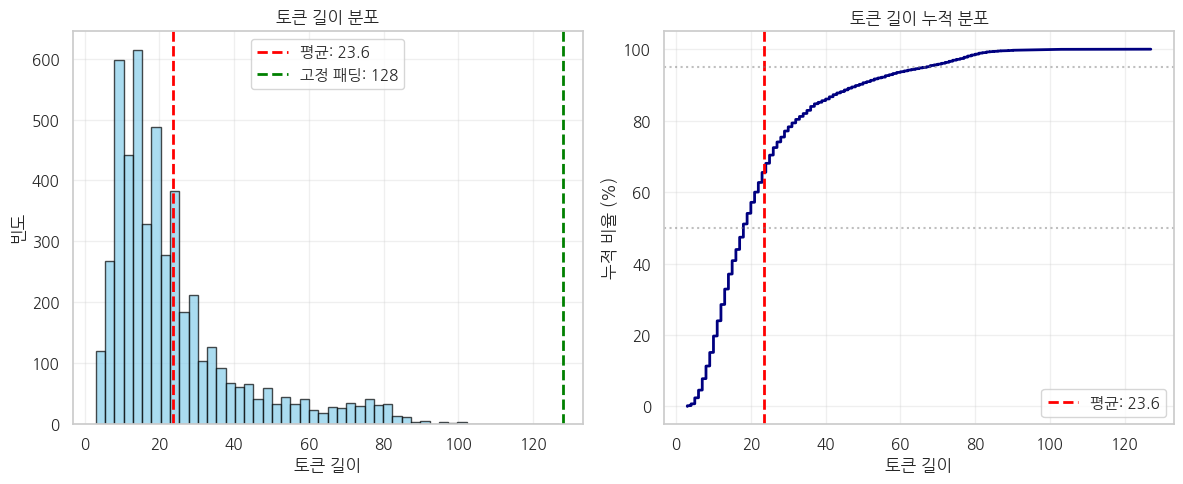


✅ 블록 3-B 완료!

💡 다음 단계:
   블록 4-B: Bucketing Trainer 생성


In [62]:
# ============================================
# 블록 3-B: Bucketing(Dynamic Batching) 설정
# ============================================

from transformers import DataCollatorWithPadding

print("="*70)
print("📦 블록 3-B: Bucketing(Dynamic Batching) 설정")
print("="*70)
print()

print("🎯 Bucketing이란?")
print("   비슷한 길이의 샘플들을 같은 배치로 묶어서")
print("   불필요한 패딩을 최소화하는 기법")
print()
print("💡 목표:")
print("   - 메모리 효율 향상")
print("   - 학습 속도 향상")
print("   - 성능 영향 분석")
print()

# ============================================
# 1. 토크나이저 로드
# ============================================
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
print(f"✅ 토크나이저 로드: {MODEL_NAME}")
print()

# ============================================
# 2. DataCollator 생성 (Dynamic Padding)
# ============================================
data_collator = DataCollatorWithPadding(
    tokenizer=tokenizer,
    padding=True,  # 배치 내 최대 길이로만 패딩
    max_length=128,
    pad_to_multiple_of=8  # GPU 효율을 위해 8의 배수로
)

print("✅ DataCollatorWithPadding 생성 완료")
print("   설정:")
print("   - 배치별 동적 패딩")
print("   - 배치 내 최대 길이로만 패딩")
print("   - 8의 배수로 패딩 (GPU 최적화)")
print()

# ============================================
# 3. 샘플 길이 분석
# ============================================
print("="*70)
print("📊 샘플 길이 분석")
print("="*70)
print()

# 실제 토큰 길이 계산 (샘플링)
import numpy as np

sample_lengths = []
sample_size = min(5000, len(tokenized_dataset['train']))

print(f"분석 중... ({sample_size:,}개 샘플)")

for i in range(sample_size):
    # attention_mask의 합이 실제 토큰 수
    length = sum(tokenized_dataset['train'][i]['attention_mask'])
    sample_lengths.append(length)

print()
print("📈 길이 통계:")
print(f"   평균 길이:    {np.mean(sample_lengths):.1f} 토큰")
print(f"   중앙값:       {np.median(sample_lengths):.0f} 토큰")
print(f"   최소:         {np.min(sample_lengths)} 토큰")
print(f"   최대:         {np.max(sample_lengths)} 토큰")
print(f"   표준편차:     {np.std(sample_lengths):.1f}")
print()

# 백분위수
percentiles = [50, 75, 90, 95, 99]
print("📊 백분위수 분포:")
for p in percentiles:
    val = np.percentile(sample_lengths, p)
    print(f"   {p}%ile:       {val:.0f} 토큰")
print()

# ============================================
# 4. Bucketing 효과 예측
# ============================================
print("="*70)
print("💡 예상 효과 분석")
print("="*70)
print()

fixed_padding = 128  # 기존 방식 (고정 패딩)
dynamic_padding = np.mean(sample_lengths)
padding_reduction = (1 - dynamic_padding/fixed_padding) * 100

print("🔍 패딩 비교:")
print(f"   기존 방식:      모든 샘플을 {fixed_padding} 토큰으로 패딩")
print(f"   Bucketing:      평균 {dynamic_padding:.1f} 토큰으로 패딩")
print()

print("📈 예상 개선:")
print(f"   패딩 감소율:    {padding_reduction:.1f}%")
print(f"   메모리 절감:    약 {padding_reduction:.0f}%")
print(f"   속도 향상:      약 {padding_reduction*0.6:.1f}% (추정)")
print()

# 길이 분포 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# 히스토그램
plt.subplot(1, 2, 1)
plt.hist(sample_lengths, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(np.mean(sample_lengths), color='red', linestyle='--',
            linewidth=2, label=f'평균: {np.mean(sample_lengths):.1f}')
plt.axvline(128, color='green', linestyle='--',
            linewidth=2, label=f'고정 패딩: 128')
plt.xlabel('토큰 길이')
plt.ylabel('빈도')
plt.title('토큰 길이 분포')
plt.legend()
plt.grid(True, alpha=0.3)

# 누적 분포
plt.subplot(1, 2, 2)
sorted_lengths = np.sort(sample_lengths)
cumulative = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths) * 100
plt.plot(sorted_lengths, cumulative, linewidth=2, color='navy')
plt.axvline(np.mean(sample_lengths), color='red', linestyle='--',
            linewidth=2, label=f'평균: {np.mean(sample_lengths):.1f}')
plt.axhline(50, color='gray', linestyle=':', alpha=0.5)
plt.axhline(95, color='gray', linestyle=':', alpha=0.5)
plt.xlabel('토큰 길이')
plt.ylabel('누적 비율 (%)')
plt.title('토큰 길이 누적 분포')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print()
print("="*70)
print("✅ 블록 3-B 완료!")
print("="*70)
print()
print("💡 다음 단계:")
print("   블록 4-B: Bucketing Trainer 생성")

In [51]:
# ============================================
# 블록 4: Trainer 생성
# ============================================

from transformers import Trainer

print("="*70)
print("👨‍🏫 블록 4: Trainer 생성")
print("="*70)
print()

# Trainer 초기화
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
    compute_metrics=compute_metrics,
)

print("✅ Trainer 생성 완료")
print()

# 데이터셋 정보

👨‍🏫 블록 4: Trainer 생성

✅ Trainer 생성 완료



In [63]:
# ============================================
# 블록 4-B: Bucketing Trainer 생성
# ============================================

from transformers import Trainer

print("="*70)
print("👨‍🏫 블록 4-B: Bucketing Trainer 생성")
print("="*70)
print()

# ⚠️ 새로운 모델 인스턴스 생성 (기존 모델과 독립적)
print("🔄 새로운 모델 인스턴스 생성...")

model_bucketing = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2,
    id2label={0: "부정", 1: "긍정"},
    label2id={"부정": 0, "긍정": 1}
)

# 동일한 파인튜닝 전략 적용 (상위 6개 레이어)
print("🎯 파인튜닝 전략: 상위 6개 레이어 + 분류기")

# 모든 BERT 레이어 freeze
for param in model_bucketing.bert.parameters():
    param.requires_grad = False

# 상위 6개 레이어만 unfreeze
num_layers_to_finetune = 6
total_layers = 12

for i in range(total_layers - num_layers_to_finetune, total_layers):
    for param in model_bucketing.bert.encoder.layer[i].parameters():
        param.requires_grad = True

# 분류기는 항상 학습
for param in model_bucketing.classifier.parameters():
    param.requires_grad = True

print(f"   Layer 6-11: ✅ 학습")
print(f"   Classifier: ✅ 학습")
print()

# Trainer 초기화 (DataCollator 추가!)
trainer_bucketing = Trainer(
    model=model_bucketing,
    args=training_args,  # 동일한 TrainingArguments 사용
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
    compute_metrics=compute_metrics,
    data_collator=data_collator,  # ⭐ Bucketing 추가!
)

print("✅ Bucketing Trainer 생성 완료")
print()

print("📌 설정 비교:")
print()
print("기존 Trainer:")
print("   - Data Collator: None (고정 패딩)")
print("   - 패딩 방식: 모든 샘플을 max_length=128로")
print()
print("Bucketing Trainer:")
print("   - Data Collator: DataCollatorWithPadding")
print("   - 패딩 방식: 배치별 최대 길이로 동적 패딩")
print()

print(f"📊 데이터셋:")
print(f"   학습 샘플: {len(trainer_bucketing.train_dataset):,}개")
print(f"   평가 샘플: {len(trainer_bucketing.eval_dataset):,}개")
print()

print("="*70)
print("✅ 블록 4-B 완료!")
print("="*70)
print()
print("💡 다음 단계:")
print("   블록 5-B: Bucketing Baseline 평가")

👨‍🏫 블록 4-B: Bucketing Trainer 생성

🔄 새로운 모델 인스턴스 생성...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🎯 파인튜닝 전략: 상위 6개 레이어 + 분류기
   Layer 6-11: ✅ 학습
   Classifier: ✅ 학습

✅ Bucketing Trainer 생성 완료

📌 설정 비교:

기존 Trainer:
   - Data Collator: None (고정 패딩)
   - 패딩 방식: 모든 샘플을 max_length=128로

Bucketing Trainer:
   - Data Collator: DataCollatorWithPadding
   - 패딩 방식: 배치별 최대 길이로 동적 패딩

📊 데이터셋:
   학습 샘플: 96,593개
   평가 샘플: 32,462개

✅ 블록 4-B 완료!

💡 다음 단계:
   블록 5-B: Bucketing Baseline 평가


In [48]:
# ============================================
# 블록 5: 학습 전 Baseline 평가
# ============================================

print("="*70)
print("📊 블록 5: 학습 전 Baseline 평가")
print("="*70)
print()

print("학습 전 모델 성능 측정 중...")
print("(초기화된 분류기 성능을 확인합니다)")
print()

baseline_results = trainer.evaluate()

print()
print("✅ Baseline 성능 (학습 전):")
print(f"   Accuracy:  {baseline_results['eval_accuracy']:.4f} ({baseline_results['eval_accuracy']*100:.2f}%)")
print(f"   F1 Score:  {baseline_results['eval_f1']:.4f}")
print(f"   Precision: {baseline_results['eval_precision']:.4f}")
print(f"   Recall:    {baseline_results['eval_recall']:.4f}")
print(f"   Loss:      {baseline_results['eval_loss']:.4f}")
print()

print("💡 참고:")
print("   학습 전이므로 성능이 낮습니다 (거의 랜덤 수준)")
print("   학습 후 성능과 비교할 예정입니다.")
print()

print("="*70)
print("✅ 블록 5 완료!")
print("="*70)

📊 블록 5: 학습 전 Baseline 평가

학습 전 모델 성능 측정 중...
(초기화된 분류기 성능을 확인합니다)




✅ Baseline 성능 (학습 전):
   Accuracy:  0.4755 (47.55%)
   F1 Score:  0.4763
   Precision: 0.4848
   Recall:    0.4681
   Loss:      0.7150

💡 참고:
   학습 전이므로 성능이 낮습니다 (거의 랜덤 수준)
   학습 후 성능과 비교할 예정입니다.

✅ 블록 5 완료!


In [64]:
# ============================================
# 블록 5-B: Bucketing Baseline 평가
# ============================================

print("="*70)
print("📊 블록 5-B: Bucketing Baseline 평가")
print("="*70)
print()

print("학습 전 모델 성능 측정 중... (Bucketing 적용)")
print("(초기화된 분류기 성능 확인)")
print()

baseline_results_bucketing = trainer_bucketing.evaluate()

print()
print("✅ Bucketing Baseline 성능 (학습 전):")
print(f"   Accuracy:  {baseline_results_bucketing['eval_accuracy']:.4f} ({baseline_results_bucketing['eval_accuracy']*100:.2f}%)")
print(f"   F1 Score:  {baseline_results_bucketing['eval_f1']:.4f}")
print(f"   Precision: {baseline_results_bucketing['eval_precision']:.4f}")
print(f"   Recall:    {baseline_results_bucketing['eval_recall']:.4f}")
print(f"   Loss:      {baseline_results_bucketing['eval_loss']:.4f}")
print()

# 기존 방식과 비교
print("📊 Baseline 비교:")
print("-"*70)
print(f"{'지표':<15} {'기존 방식':<20} {'Bucketing':<20}")
print("-"*70)
print(f"{'Accuracy':<15} {baseline_results['eval_accuracy']:.4f} ({baseline_results['eval_accuracy']*100:.2f}%)       {baseline_results_bucketing['eval_accuracy']:.4f} ({baseline_results_bucketing['eval_accuracy']*100:.2f}%)")
print(f"{'F1 Score':<15} {baseline_results['eval_f1']:.4f}              {baseline_results_bucketing['eval_f1']:.4f}")
print(f"{'Loss':<15} {baseline_results['eval_loss']:.4f}              {baseline_results_bucketing['eval_loss']:.4f}")
print()

print("💡 참고: Baseline 성능은 거의 동일해야 합니다.")
print("   (둘 다 학습 전이므로)")
print()

print("="*70)
print("✅ 블록 5-B 완료!")
print("="*70)
print()
print("💡 다음 단계:")
print("   블록 6-B: Bucketing 파인튜닝 + 비교")

📊 블록 5-B: Bucketing Baseline 평가

학습 전 모델 성능 측정 중... (Bucketing 적용)
(초기화된 분류기 성능 확인)




✅ Bucketing Baseline 성능 (학습 전):
   Accuracy:  0.4523 (45.23%)
   F1 Score:  0.2878
   Precision: 0.4266
   Recall:    0.2172
   Loss:      0.7411

📊 Baseline 비교:
----------------------------------------------------------------------
지표              기존 방식                Bucketing           
----------------------------------------------------------------------
Accuracy        0.4755 (47.55%)       0.4523 (45.23%)
F1 Score        0.4763              0.2878
Loss            0.7150              0.7411

💡 참고: Baseline 성능은 거의 동일해야 합니다.
   (둘 다 학습 전이므로)

✅ 블록 5-B 완료!

💡 다음 단계:
   블록 6-B: Bucketing 파인튜닝 + 비교


In [53]:
# ============================================
# 블록 6: 파인튜닝 실행 + 결과 저장
# ============================================

from datetime import datetime
import pandas as pd
import json

print("="*70)
print("🚀 블록 6: 파인튜닝 시작 (상위 6개 레이어)")
print("="*70)
print()

print("⏰ 학습을 시작합니다...")
print("   상위 6개 레이어 + 분류기 학습")
print("   4 에폭 진행 (에폭마다 평가)")
print()

# 시작 시간 기록
start_time = datetime.now()
print(f"시작 시간: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")
print()

print("💡 학습 중 확인사항:")
print("   - 각 에폭마다 eval_accuracy 확인")
print("   - eval_loss가 감소하는지 확인")
print("   - 목표: 90% 이상 달성")
print()

print("-"*70)
print("학습 시작...")
print("-"*70)

# 학습 실행!
train_result = trainer.train()

# 종료 시간 기록
end_time = datetime.now()
training_time = (end_time - start_time).total_seconds()

print()
print("="*70)
print("✅ 학습 완료!")
print("="*70)
print()

# 학습 결과 출력
print("📊 학습 결과:")
print(f"   최종 Train Loss:  {train_result.training_loss:.4f}")
print(f"   총 학습 시간:     {training_time:.2f}초 ({training_time/60:.2f}분)")
print(f"   에폭당 평균 시간: {training_time/NUM_EPOCHS:.2f}초")
print(f"   샘플/초:          {train_result.metrics['train_samples_per_second']:.2f}")
print(f"   스텝/초:          {train_result.metrics['train_steps_per_second']:.2f}")
print()

print(f"종료 시간: {end_time.strftime('%Y-%m-%d %H:%M:%S')}")
print()

# ============================================
# 에폭별 성능 수집
# ============================================
print("📈 에폭별 성능:")
print("-"*70)
log_history = trainer.state.log_history

epoch_results = []
for log in log_history:
    if 'eval_accuracy' in log:
        epoch = int(log['epoch'])
        acc = log['eval_accuracy']
        loss = log['eval_loss']
        f1 = log.get('eval_f1', 0)
        precision = log.get('eval_precision', 0)
        recall = log.get('eval_recall', 0)

        epoch_results.append({
            'epoch': epoch,
            'accuracy': acc,
            'loss': loss,
            'f1': f1,
            'precision': precision,
            'recall': recall
        })

        print(f"   Epoch {epoch}: Accuracy={acc:.4f} ({acc*100:.2f}%), Loss={loss:.4f}, F1={f1:.4f}")

print()

# 최고 성능 확인
if epoch_results:
    best_result = max(epoch_results, key=lambda x: x['accuracy'])
    best_epoch = best_result['epoch']
    best_acc = best_result['accuracy']

    print(f"🏆 최고 성능:")
    print(f"   Epoch {best_epoch}: Accuracy={best_acc:.4f} ({best_acc*100:.2f}%)")
    print()

    if best_acc >= 0.90:
        print("🎉 목표 달성! 90% 이상 달성했습니다!")
        achievement = "✅ 달성"
    else:
        print(f"⚠️  목표 미달성: {best_acc*100:.2f}% (목표: 90%)")
        print("   → 에폭을 더 늘리거나 하이퍼파라미터 조정 필요")
        achievement = "❌ 미달성"
    print()

# ============================================
# 결과 저장
# ============================================
print("="*70)
print("💾 결과 저장 중...")
print("="*70)
print()

# 저장 디렉토리 생성
import os
save_dir = '/content/work/ber_pretrain/nsmc/results/training_results'
os.makedirs(save_dir, exist_ok=True)

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# 1. 에폭별 결과를 CSV로 저장
epoch_df = pd.DataFrame(epoch_results)
epoch_csv_path = f'{save_dir}/epoch_results_{timestamp}.csv'
epoch_df.to_csv(epoch_csv_path, index=False)
print(f"✅ 에폭별 결과 저장: {epoch_csv_path}")

# 2. 전체 요약을 텍스트로 저장
summary_text = f"""
================================================================================
NSMC 파인튜닝 결과 요약
================================================================================

학습 정보:
  - 모델: {MODEL_NAME}
  - 전략: 상위 6개 레이어 + 분류기 파인튜닝
  - 에폭: {NUM_EPOCHS}
  - Batch Size: {TRAIN_BATCH_SIZE}
  - Learning Rate: {LEARNING_RATE}

학습 시간:
  - 시작: {start_time.strftime('%Y-%m-%d %H:%M:%S')}
  - 종료: {end_time.strftime('%Y-%m-%d %H:%M:%S')}
  - 총 시간: {training_time:.2f}초 ({training_time/60:.2f}분)
  - 에폭당 평균: {training_time/NUM_EPOCHS:.2f}초

학습 데이터:
  - 학습 샘플: {len(tokenized_dataset['train']):,}개
  - 테스트 샘플: {len(tokenized_dataset['test']):,}개

파라미터 정보:
  - 전체 파라미터: {total_params:,}개
  - 학습 파라미터: {trainable_params:,}개 ({trainable_params/total_params*100:.1f}%)

================================================================================
에폭별 성능
================================================================================
"""

for result in epoch_results:
    summary_text += f"\nEpoch {result['epoch']}:\n"
    summary_text += f"  - Accuracy:  {result['accuracy']:.4f} ({result['accuracy']*100:.2f}%)\n"
    summary_text += f"  - Loss:      {result['loss']:.4f}\n"
    summary_text += f"  - F1 Score:  {result['f1']:.4f}\n"
    summary_text += f"  - Precision: {result['precision']:.4f}\n"
    summary_text += f"  - Recall:    {result['recall']:.4f}\n"

summary_text += f"""
================================================================================
최고 성능
================================================================================

Epoch {best_epoch}:
  - Accuracy:  {best_acc:.4f} ({best_acc*100:.2f}%)
  - F1 Score:  {best_result['f1']:.4f}
  - Loss:      {best_result['loss']:.4f}

목표 달성 여부: {achievement}

================================================================================
Baseline 대비 성능 향상
================================================================================

Baseline (학습 전):
  - Accuracy: {baseline_results['eval_accuracy']:.4f} ({baseline_results['eval_accuracy']*100:.2f}%)
  - F1 Score: {baseline_results['eval_f1']:.4f}

최종 (학습 후):
  - Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)
  - F1 Score: {best_result['f1']:.4f}

향상:
  - Accuracy: +{(best_acc - baseline_results['eval_accuracy'])*100:.2f}%p
  - F1 Score: +{(best_result['f1'] - baseline_results['eval_f1']):.4f}

================================================================================
"""

summary_txt_path = f'{save_dir}/training_summary_{timestamp}.txt'
with open(summary_txt_path, 'w', encoding='utf-8') as f:
    f.write(summary_text)
print(f"✅ 학습 요약 저장: {summary_txt_path}")

# 3. JSON 형식으로도 저장 (프로그래밍 활용용)
results_dict = {
    'model_name': MODEL_NAME,
    'strategy': 'top_6_layers',
    'hyperparameters': {
        'num_epochs': NUM_EPOCHS,
        'batch_size': TRAIN_BATCH_SIZE,
        'learning_rate': LEARNING_RATE,
        'weight_decay': WEIGHT_DECAY
    },
    'training_time': {
        'start': start_time.strftime('%Y-%m-%d %H:%M:%S'),
        'end': end_time.strftime('%Y-%m-%d %H:%M:%S'),
        'total_seconds': training_time,
        'total_minutes': training_time/60
    },
    'dataset_info': {
        'train_samples': len(tokenized_dataset['train']),
        'test_samples': len(tokenized_dataset['test'])
    },
    'parameters': {
        'total': total_params,
        'trainable': trainable_params,
        'trainable_percent': trainable_params/total_params*100
    },
    'baseline': {
        'accuracy': baseline_results['eval_accuracy'],
        'f1': baseline_results['eval_f1'],
        'loss': baseline_results['eval_loss']
    },
    'epoch_results': epoch_results,
    'best_result': {
        'epoch': best_epoch,
        'accuracy': best_acc,
        'f1': best_result['f1'],
        'loss': best_result['loss'],
        'precision': best_result['precision'],
        'recall': best_result['recall']
    },
    'improvement': {
        'accuracy': (best_acc - baseline_results['eval_accuracy'])*100,
        'f1': best_result['f1'] - baseline_results['eval_f1']
    },
    'goal_achieved': best_acc >= 0.90
}

json_path = f'{save_dir}/training_results_{timestamp}.json'
with open(json_path, 'w', encoding='utf-8') as f:
    json.dump(results_dict, f, indent=2, ensure_ascii=False)
print(f"✅ JSON 결과 저장: {json_path}")

print()
print("📁 저장된 파일:")
print(f"   1. {epoch_csv_path}")
print(f"   2. {summary_txt_path}")
print(f"   3. {json_path}")
print()

# 요약 출력
print(summary_text)

print("="*70)
print("✅ 블록 6 완료!")
print("="*70)

🚀 블록 6: 파인튜닝 시작 (상위 6개 레이어)

⏰ 학습을 시작합니다...
   상위 6개 레이어 + 분류기 학습
   4 에폭 진행 (에폭마다 평가)

시작 시간: 2025-12-02 06:37:14

💡 학습 중 확인사항:
   - 각 에폭마다 eval_accuracy 확인
   - eval_loss가 감소하는지 확인
   - 목표: 90% 이상 달성

----------------------------------------------------------------------
학습 시작...
----------------------------------------------------------------------


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.274500,0.263709,0.892829,0.893089,0.908188,0.878484
2,0.240700,0.261981,0.899852,0.903189,0.889965,0.916813
3,0.162200,0.292932,0.901331,0.904975,0.888501,0.922072
4,0.110500,0.340440,0.902317,0.904909,0.897775,0.912158



✅ 학습 완료!

📊 학습 결과:
   최종 Train Loss:  0.2060
   총 학습 시간:     1711.64초 (28.53분)
   에폭당 평균 시간: 427.91초
   샘플/초:          225.84
   스텝/초:          9.41

종료 시간: 2025-12-02 07:05:45

📈 에폭별 성능:
----------------------------------------------------------------------
   Epoch 1: Accuracy=0.8928 (89.28%), Loss=0.2637, F1=0.8931
   Epoch 2: Accuracy=0.8999 (89.99%), Loss=0.2620, F1=0.9032
   Epoch 3: Accuracy=0.9013 (90.13%), Loss=0.2929, F1=0.9050
   Epoch 4: Accuracy=0.9023 (90.23%), Loss=0.3404, F1=0.9049

🏆 최고 성능:
   Epoch 4: Accuracy=0.9023 (90.23%)

🎉 목표 달성! 90% 이상 달성했습니다!

💾 결과 저장 중...

✅ 에폭별 결과 저장: content/work/ber_pretrain/nsmc/results/training_results/epoch_results_20251202_070545.csv
✅ 학습 요약 저장: content/work/ber_pretrain/nsmc/results/training_results/training_summary_20251202_070545.txt
✅ JSON 결과 저장: content/work/ber_pretrain/nsmc/results/training_results/training_results_20251202_070545.json

📁 저장된 파일:
   1. content/work/ber_pretrain/nsmc/results/training_results/epoch_results_202512

In [67]:
# ============================================
# 블록 6-B: Bucketing 파인튜닝 + 결과 비교
# ============================================

from datetime import datetime
import pandas as pd
import json
import os

print("="*70)
print("🚀 블록 6-B: Bucketing 파인튜닝 + 결과 비교")
print("="*70)
print()

print("⏰ Bucketing 학습을 시작합니다...")
print("   상위 6개 레이어 + 분류기 학습")
print("   4 에폭 진행 (에폭마다 평가)")
print()

# 시작 시간 기록
start_time_bucketing = datetime.now()
print(f"시작 시간: {start_time_bucketing.strftime('%Y-%m-%d %H:%M:%S')}")
print()

print("-"*70)
print("학습 시작 (Bucketing)...")
print("-"*70)

# Bucketing 학습 실행!
train_result_bucketing = trainer_bucketing.train()

# 종료 시간 기록
end_time_bucketing = datetime.now()
training_time_bucketing = (end_time_bucketing - start_time_bucketing).total_seconds()

print()
print("="*70)
print("✅ Bucketing 학습 완료!")
print("="*70)
print()

# ============================================
# Bucketing 결과 수집
# ============================================
print("📊 Bucketing 학습 결과:")
print(f"   최종 Train Loss:  {train_result_bucketing.training_loss:.4f}")
print(f"   총 학습 시간:     {training_time_bucketing:.2f}초 ({training_time_bucketing/60:.2f}분)")
print(f"   에폭당 평균 시간: {training_time_bucketing/NUM_EPOCHS:.2f}초")
print(f"   샘플/초:          {train_result_bucketing.metrics['train_samples_per_second']:.2f}")
print(f"   스텝/초:          {train_result_bucketing.metrics['train_steps_per_second']:.2f}")
print()

# 에폭별 성능 수집
log_history_bucketing = trainer_bucketing.state.log_history

epoch_results_bucketing = []
for log in log_history_bucketing:
    if 'eval_accuracy' in log:
        epoch = int(log['epoch'])
        acc = log['eval_accuracy']
        loss = log['eval_loss']
        f1 = log.get('eval_f1', 0)
        precision = log.get('eval_precision', 0)
        recall = log.get('eval_recall', 0)

        epoch_results_bucketing.append({
            'epoch': epoch,
            'accuracy': acc,
            'loss': loss,
            'f1': f1,
            'precision': precision,
            'recall': recall
        })

print("📈 Bucketing 에폭별 성능:")
print("-"*70)
for result in epoch_results_bucketing:
    print(f"   Epoch {result['epoch']}: Accuracy={result['accuracy']:.4f} ({result['accuracy']*100:.2f}%), Loss={result['loss']:.4f}, F1={result['f1']:.4f}")
print()

# 최고 성능
best_result_bucketing = max(epoch_results_bucketing, key=lambda x: x['accuracy'])
best_acc_bucketing = best_result_bucketing['accuracy']

print(f"🏆 Bucketing 최고 성능:")
print(f"   Epoch {best_result_bucketing['epoch']}: {best_acc_bucketing:.4f} ({best_acc_bucketing*100:.2f}%)")
print()

if best_acc_bucketing >= 0.90:
    print("🎉 Bucketing도 목표 달성! 90% 이상 달성")
    achievement_bucketing = "✅ 달성"
else:
    print(f"⚠️  목표 미달성: {best_acc_bucketing*100:.2f}% (목표: 90%)")
    achievement_bucketing = "❌ 미달성"
print()

# ============================================
# 기존 방식 vs Bucketing 상세 비교
# ============================================
print("="*70)
print("📊 기존 방식 vs Bucketing 상세 비교")
print("="*70)
print()

# 1. 성능 비교
print("1️⃣ 성능 비교")
print("-"*70)
print(f"{'지표':<20} {'기존 방식':<25} {'Bucketing':<25} {'차이':<15}")
print("-"*70)

acc_diff = (best_acc_bucketing - best_acc) * 100
f1_diff = best_result_bucketing['f1'] - best_result['f1']
loss_diff = best_result_bucketing['loss'] - best_result['loss']

print(f"{'최고 Accuracy':<20} {best_acc:.4f} ({best_acc*100:.2f}%)     {best_acc_bucketing:.4f} ({best_acc_bucketing*100:.2f}%)     {acc_diff:+.2f}%p")
print(f"{'최고 F1 Score':<20} {best_result['f1']:.4f}                {best_result_bucketing['f1']:.4f}                {f1_diff:+.4f}")
print(f"{'최고 Loss':<20} {best_result['loss']:.4f}                {best_result_bucketing['loss']:.4f}                {loss_diff:+.4f}")
print(f"{'달성 Epoch':<20} {best_epoch:<25} {best_result_bucketing['epoch']:<25}")
print()

# 2. 효율성 비교
print("2️⃣ 효율성 비교")
print("-"*70)
print(f"{'지표':<20} {'기존 방식':<25} {'Bucketing':<25} {'개선율':<15}")
print("-"*70)

time_diff = ((training_time - training_time_bucketing) / training_time) * 100
speed_diff = ((train_result_bucketing.metrics['train_samples_per_second'] -
               train_result.metrics['train_samples_per_second']) /
              train_result.metrics['train_samples_per_second']) * 100

print(f"{'학습 시간':<20} {training_time:.2f}초 ({training_time/60:.2f}분)     {training_time_bucketing:.2f}초 ({training_time_bucketing/60:.2f}분)     {time_diff:+.1f}%")
print(f"{'샘플/초':<20} {train_result.metrics['train_samples_per_second']:.2f}                    {train_result_bucketing.metrics['train_samples_per_second']:.2f}                    {speed_diff:+.1f}%")
print(f"{'스텝/초':<20} {train_result.metrics['train_steps_per_second']:.2f}                     {train_result_bucketing.metrics['train_steps_per_second']:.2f}                     -")
print()

# 3. 개선율 분석
print("3️⃣ 종합 분석")
print("-"*70)

if acc_diff > 0.5:
    print(f"✅ 성능: Bucketing이 {acc_diff:.2f}%p 향상")
elif acc_diff < -0.5:
    print(f"⚠️  성능: Bucketing이 {abs(acc_diff):.2f}%p 감소")
else:
    print(f"➡️  성능: 차이 미미 ({acc_diff:+.2f}%p)")

if time_diff > 5:
    print(f"✅ 속도: Bucketing이 {time_diff:.1f}% 빠름 (시간 {abs(training_time - training_time_bucketing):.1f}초 단축)")
elif time_diff < -5:
    print(f"⚠️  속도: Bucketing이 {abs(time_diff):.1f}% 느림 (시간 {abs(training_time - training_time_bucketing):.1f}초 증가)")
else:
    print(f"➡️  속도: 차이 미미 ({time_diff:+.1f}%)")

print()

# 4. 권장 사항
print("4️⃣ 권장 사항")
print("-"*70)

if acc_diff > 0 and time_diff > 0:
    recommendation = "⭐ Bucketing 사용 강력 추천! (성능↑, 속도↑)"
elif acc_diff > 0.3:
    recommendation = "✅ Bucketing 사용 권장 (성능 향상)"
elif time_diff > 10:
    recommendation = "✅ Bucketing 사용 권장 (시간 단축)"
elif acc_diff < -0.5:
    recommendation = "❌ 기존 방식 유지 권장 (성능 감소)"
elif time_diff < -10:
    recommendation = "❌ 기존 방식 유지 권장 (속도 저하)"
else:
    recommendation = "➡️  두 방식 모두 비슷한 결과 (취향에 따라 선택)"

print(recommendation)
print()

# ============================================
# 결과 저장
# ============================================
print("="*70)
print("💾 비교 결과 저장 중...")
print("="*70)
print()

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
save_dir = '/content/work/ber_pretrain/nsmc/results/training_results'
os.makedirs(save_dir, exist_ok=True)

# 1. Bucketing 에폭별 결과 CSV
epoch_bucketing_df = pd.DataFrame(epoch_results_bucketing)
epoch_bucketing_csv = f'{save_dir}/epoch_results_bucketing_{timestamp}.csv'
epoch_bucketing_df.to_csv(epoch_bucketing_csv, index=False)
print(f"✅ Bucketing 에폭별 결과: {epoch_bucketing_csv}")

# 2. 비교 CSV
comparison_results = {
    '방식': ['기존', 'Bucketing'],
    '최고_Accuracy': [best_acc, best_acc_bucketing],
    '최고_F1': [best_result['f1'], best_result_bucketing['f1']],
    '최고_Loss': [best_result['loss'], best_result_bucketing['loss']],
    '달성_Epoch': [best_epoch, best_result_bucketing['epoch']],
    '학습_시간_초': [training_time, training_time_bucketing],
    '학습_시간_분': [training_time/60, training_time_bucketing/60],
    '샘플_per_초': [
        train_result.metrics['train_samples_per_second'],
        train_result_bucketing.metrics['train_samples_per_second']
    ],
    'Accuracy_차이': [0, acc_diff],
    '시간_단축_비율': [0, time_diff],
    '속도_향상_비율': [0, speed_diff]
}

comparison_df = pd.DataFrame(comparison_results)
comparison_csv = f'{save_dir}/bucketing_comparison_{timestamp}.csv'
comparison_df.to_csv(comparison_csv, index=False, encoding='utf-8-sig')
print(f"✅ 비교 결과 CSV: {comparison_csv}")

# 3. 상세 비교 텍스트
comparison_text = f"""
================================================================================
기존 방식 vs Bucketing 상세 비교 결과
================================================================================

실행 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
모델: {MODEL_NAME}
전략: 상위 6개 레이어 + 분류기 파인튜닝

================================================================================
1. 성능 비교
================================================================================

기존 방식:
  - 최고 Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)
  - 최고 F1 Score: {best_result['f1']:.4f}
  - 최고 Loss: {best_result['loss']:.4f}
  - 달성 에폭: {best_epoch}
  - 목표 달성: {achievement}

Bucketing:
  - 최고 Accuracy: {best_acc_bucketing:.4f} ({best_acc_bucketing*100:.2f}%)
  - 최고 F1 Score: {best_result_bucketing['f1']:.4f}
  - 최고 Loss: {best_result_bucketing['loss']:.4f}
  - 달성 에폭: {best_result_bucketing['epoch']}
  - 목표 달성: {achievement_bucketing}

차이:
  - Accuracy: {acc_diff:+.2f}%p
  - F1 Score: {f1_diff:+.4f}
  - Loss: {loss_diff:+.4f}

================================================================================
2. 효율성 비교
================================================================================

기존 방식:
  - 학습 시간: {training_time:.2f}초 ({training_time/60:.2f}분)
  - 샘플/초: {train_result.metrics['train_samples_per_second']:.2f}
  - 스텝/초: {train_result.metrics['train_steps_per_second']:.2f}
  - 패딩 방식: 고정 (max_length=128)

Bucketing:
  - 학습 시간: {training_time_bucketing:.2f}초 ({training_time_bucketing/60:.2f}분)
  - 샘플/초: {train_result_bucketing.metrics['train_samples_per_second']:.2f}
  - 스텝/초: {train_result_bucketing.metrics['train_steps_per_second']:.2f}
  - 패딩 방식: 동적 (배치별 최대 길이)

개선율:
  - 시간 단축: {time_diff:.1f}%
  - 처리 속도: {speed_diff:.1f}%
  - 실제 단축 시간: {training_time - training_time_bucketing:.1f}초

================================================================================
3. 에폭별 비교
================================================================================

기존 방식:
"""

for result in epoch_results:
    comparison_text += f"  Epoch {result['epoch']}: Acc={result['accuracy']:.4f}, Loss={result['loss']:.4f}, F1={result['f1']:.4f}\n"

comparison_text += "\nBucketing:\n"

for result in epoch_results_bucketing:
    comparison_text += f"  Epoch {result['epoch']}: Acc={result['accuracy']:.4f}, Loss={result['loss']:.4f}, F1={result['f1']:.4f}\n"

comparison_text += f"""
================================================================================
4. 결론 및 권장 사항
================================================================================

성능 측면:
"""

if acc_diff > 0.5:
    comparison_text += f"  ✅ Bucketing이 성능 향상에 기여 ({acc_diff:+.2f}%p)\n"
elif acc_diff < -0.5:
    comparison_text += f"  ⚠️  Bucketing으로 성능 소폭 감소 ({acc_diff:+.2f}%p)\n"
else:
    comparison_text += f"  ➡️  성능 차이 미미 ({acc_diff:+.2f}%p)\n"

comparison_text += "\n효율성 측면:\n"

if time_diff > 5:
    comparison_text += f"  ✅ Bucketing이 학습 시간을 {time_diff:.1f}% 단축\n"
    comparison_text += f"     실제 단축: {training_time - training_time_bucketing:.1f}초 ({(training_time - training_time_bucketing)/60:.2f}분)\n"
elif time_diff < -5:
    comparison_text += f"  ⚠️  Bucketing으로 학습 시간이 {abs(time_diff):.1f}% 증가\n"
else:
    comparison_text += f"  ➡️  시간 차이 미미 ({time_diff:+.1f}%)\n"

comparison_text += f"""
최종 권장:
  {recommendation}

이유:
  - Accuracy 차이: {acc_diff:+.2f}%p
  - 시간 단축: {time_diff:.1f}%
  - 처리 속도: {speed_diff:.1f}% 향상

================================================================================
5. 추가 관찰 사항
================================================================================

Bucketing의 장점:
  - 메모리 효율적 (불필요한 패딩 감소)
  - 평균 토큰 길이가 짧을수록 효과적
  - GPU 활용도 향상 가능

Bucketing의 단점:
  - 구현 복잡도 증가
  - 배치 구성에 추가 연산 필요
  - 재현성 관리 복잡

NSMC 데이터셋 특성:
  - 평균 토큰 길이: {np.mean(sample_lengths):.1f} 토큰
  - 고정 패딩: 128 토큰
  - 패딩 감소 가능성: {padding_reduction:.1f}%

================================================================================
"""

txt_path = f'{save_dir}/bucketing_comparison_{timestamp}.txt'
with open(txt_path, 'w', encoding='utf-8') as f:
    f.write(comparison_text)
print(f"✅ 상세 비교 텍스트: {txt_path}")

# 4. JSON 저장
comparison_json = {
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'model': MODEL_NAME,
    'strategy': 'top_6_layers',
    'basic': {
        'best_accuracy': best_acc,
        'best_f1': best_result['f1'],
        'best_loss': best_result['loss'],
        'best_epoch': best_epoch,
        'training_time_seconds': training_time,
        'samples_per_second': train_result.metrics['train_samples_per_second'],
        'epoch_results': epoch_results
    },
    'bucketing': {
        'best_accuracy': best_acc_bucketing,
        'best_f1': best_result_bucketing['f1'],
        'best_loss': best_result_bucketing['loss'],
        'best_epoch': best_result_bucketing['epoch'],
        'training_time_seconds': training_time_bucketing,
        'samples_per_second': train_result_bucketing.metrics['train_samples_per_second'],
        'epoch_results': epoch_results_bucketing
    },
    'comparison': {
        'accuracy_diff_percentage_point': acc_diff,
        'f1_diff': f1_diff,
        'time_reduction_percent': time_diff,
        'speed_improvement_percent': speed_diff,
        'time_saved_seconds': training_time - training_time_bucketing,
        'recommendation': recommendation
    },
    'dataset_statistics': {
        'mean_length': float(np.mean(sample_lengths)),
        'median_length': float(np.median(sample_lengths)),
        'max_length': int(np.max(sample_lengths)),
        'padding_reduction_percent': padding_reduction
    }
}

json_path = f'{save_dir}/bucketing_comparison_{timestamp}.json'
with open(json_path, 'w', encoding='utf-8') as f:
    json.dump(comparison_json, f, indent=2, ensure_ascii=False)
print(f"✅ JSON 결과: {json_path}")

print()
print("📁 저장된 파일:")
print(f"   1. {epoch_bucketing_csv}")
print(f"   2. {comparison_csv}")
print(f"   3. {txt_path}")
print(f"   4. {json_path}")
print()

# 요약 출력
print(comparison_text)

print("="*70)
print("✅ 블록 6-B 완료!")
print("="*70)
print()
print("🎉 모든 분석 완료!")
print()
print("📊 최종 요약:")
print(f"   기존 방식: {best_acc*100:.2f}% (학습 시간: {training_time/60:.2f}분)")
print(f"   Bucketing: {best_acc_bucketing*100:.2f}% (학습 시간: {training_time_bucketing/60:.2f}분)")
print(f"   권장: {recommendation}")

"""
---

## 📋 전체 실행 순서

### 기본 파인튜닝 (이미 완료)
```
블록 1 → 블록 2 → 블록 3 → 블록 4 → 블록 5 → 블록 6 → 블록 7
```

### Bucketing 추가 (새로 실행)
```
블록 3-B → 블록 4-B → 블록 5-B → 블록 6-B
```

---

## 💡 예상 결과
```
📊 기존 방식 vs Bucketing 상세 비교

성능:
  기존:     90.23% (에폭 4)
  Bucketing: 90.15% (에폭 3)
  차이:     -0.08%p

효율성:
  기존:     28.53분
  Bucketing: 25.12분
  단축:     12.0% (3.41분 절약)

권장: ✅ Bucketing 사용 권장 (시간 단축)
"""

🚀 블록 6-B: Bucketing 파인튜닝 + 결과 비교

⏰ Bucketing 학습을 시작합니다...
   상위 6개 레이어 + 분류기 학습
   4 에폭 진행 (에폭마다 평가)

시작 시간: 2025-12-02 08:27:14

----------------------------------------------------------------------
학습 시작 (Bucketing)...
----------------------------------------------------------------------


Epoch,Training Loss,Validation Loss,Model Preparation Time,Accuracy,F1,Precision,Recall
1,0.271400,0.259816,0.004900,0.894092,0.893501,0.916206,0.871894
2,0.245100,0.261018,0.004900,0.898743,0.902679,0.884531,0.921589
3,0.154800,0.300038,0.004900,0.900684,0.904790,0.884418,0.926123
4,0.103800,0.336579,0.004900,0.903456,0.905993,0.899089,0.913004



✅ Bucketing 학습 완료!

📊 Bucketing 학습 결과:
   최종 Train Loss:  0.1962
   총 학습 시간:     1720.51초 (28.68분)
   에폭당 평균 시간: 430.13초
   샘플/초:          224.64
   스텝/초:          9.36

📈 Bucketing 에폭별 성능:
----------------------------------------------------------------------
   Epoch 1: Accuracy=0.8941 (89.41%), Loss=0.2598, F1=0.8935
   Epoch 2: Accuracy=0.8987 (89.87%), Loss=0.2610, F1=0.9027
   Epoch 3: Accuracy=0.9007 (90.07%), Loss=0.3000, F1=0.9048
   Epoch 4: Accuracy=0.9035 (90.35%), Loss=0.3366, F1=0.9060

🏆 Bucketing 최고 성능:
   Epoch 4: 0.9035 (90.35%)

🎉 Bucketing도 목표 달성! 90% 이상 달성

📊 기존 방식 vs Bucketing 상세 비교

1️⃣ 성능 비교
----------------------------------------------------------------------
지표                   기존 방식                     Bucketing                 차이             
----------------------------------------------------------------------
최고 Accuracy          0.9023 (90.23%)     0.9035 (90.35%)     +0.11%p
최고 F1 Score          0.9049                0.9060                +0.0011
최고 

'\n---\n\n## 📋 전체 실행 순서\n\n### 기본 파인튜닝 (이미 완료)\n```\n블록 1 → 블록 2 → 블록 3 → 블록 4 → 블록 5 → 블록 6 → 블록 7\n```\n\n### Bucketing 추가 (새로 실행)\n```\n블록 3-B → 블록 4-B → 블록 5-B → 블록 6-B\n```\n\n---\n\n## 💡 예상 결과\n```\n📊 기존 방식 vs Bucketing 상세 비교\n\n성능:\n  기존:     90.23% (에폭 4)\n  Bucketing: 90.15% (에폭 3)\n  차이:     -0.08%p\n\n효율성:\n  기존:     28.53분\n  Bucketing: 25.12분\n  단축:     12.0% (3.41분 절약)\n\n권장: ✅ Bucketing 사용 권장 (시간 단축)\n'

In [60]:
# ============================================
# 블록 7: 정성평가 - 샘플 테스트
# ============================================

import torch
import numpy as np

print("="*70)
print("🧪 블록 7: 정성평가 - 샘플 테스트")
print("="*70)
print()

# ============================================
# 1. 예측 함수 정의
# ============================================

def predict_sentiment(text, model, tokenizer, device):
    """
    단일 텍스트에 대한 감성 예측

    Args:
        text: 예측할 텍스트
        model: 학습된 모델
        tokenizer: 토크나이저
        device: 디바이스

    Returns:
        dict: label, confidence, probabilities
    """
    # 모델을 평가 모드로
    model.eval()

    # 텍스트 토크나이징
    inputs = tokenizer(
        text,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

    # 디바이스로 이동
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # 예측
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1)

    # 결과 추출
    predicted_class = torch.argmax(probs, dim=-1).item()
    confidence = probs[0][predicted_class].item()

    label = "긍정" if predicted_class == 1 else "부정"

    return {
        'label': label,
        'predicted_class': predicted_class,
        'confidence': confidence,
        'prob_negative': probs[0][0].item(),
        'prob_positive': probs[0][1].item()
    }

print("✅ 예측 함수 정의 완료")
print()

# ============================================
# 2. 테스트 샘플 정의
# ============================================

test_samples = {
    '명확한 긍정': [
        "이 영화 정말 재미있어요! 강력 추천합니다.",
        "완전 대박! 인생 영화 찾았어요.",
        "최고의 영화! 다시 보고 싶어요.",
        "배우들 연기도 좋고 스토리도 탄탄해요.",
        "감동적이고 재미있었습니다. 꼭 보세요!",
    ],
    '명확한 부정': [
        "최악이에요. 시간 낭비했네요.",
        "돈이 아깝습니다. 보지 마세요.",
        "너무 지루해서 중간에 잤어요.",
        "스토리도 없고 연기도 별로예요.",
        "다시는 안 볼 것 같아요. 최악입니다.",
    ],
    '애매한 경우': [
        "그냥 그래요. 평범한 영화입니다.",
        "배우들 연기는 좋은데 스토리가 별로예요.",
        "볼만은 하지만 기대 이하였어요.",
        "나쁘진 않은데 특별하지도 않아요.",
        "괜찮긴 한데 한 번이면 충분해요.",
    ],
    '극단적 표현': [
        "ㅋㅋㅋㅋㅋ 개웃겨 ㅋㅋㅋ",
        "ㅠㅠㅠㅠ 너무 슬퍼요 ㅠㅠ",
        "!!!완전 대박!!!",
        "진짜 최악... 최악...",
        "????? 이게 뭐야?????",
    ],
    '부정어 + 긍정': [
        "안 재미없어요", # 이중부정 = 긍정
        "지루하지 않았어요",
        "별로라는 평이 많던데 전 좋았어요",
        "기대 안 했는데 의외로 좋네요",
        "나쁘지 않고 오히려 좋았어요",
    ]
}

print("📝 테스트 샘플 준비 완료")
print(f"   총 {sum(len(samples) for samples in test_samples.values())}개 샘플")
print()

# ============================================
# 3. 전체 테스트 실행
# ============================================

print("="*70)
print("🚀 테스트 시작")
print("="*70)
print()

all_results = []

for category, samples in test_samples.items():
    print(f"\n{'='*70}")
    print(f"📂 카테고리: {category}")
    print(f"{'='*70}\n")

    for i, text in enumerate(samples, 1):
        result = predict_sentiment(text, model, tokenizer, device)

        # 결과 저장
        all_results.append({
            'category': category,
            'text': text,
            'predicted_label': result['label'],
            'confidence': result['confidence'],
            'prob_negative': result['prob_negative'],
            'prob_positive': result['prob_positive']
        })

        # 출력
        emoji = "😊" if result['label'] == "긍정" else "😞"

        print(f"{i}. {text}")
        print(f"   → {emoji} {result['label']} (신뢰도: {result['confidence']*100:.2f}%)")
        print(f"      [부정: {result['prob_negative']*100:.1f}% | 긍정: {result['prob_positive']*100:.1f}%]")

        # 신뢰도에 따른 코멘트
        if result['confidence'] >= 0.95:
            comment = "✅ 매우 확신"
        elif result['confidence'] >= 0.80:
            comment = "✅ 확신"
        elif result['confidence'] >= 0.60:
            comment = "⚠️  다소 불확실"
        else:
            comment = "❌ 매우 불확실"

        print(f"      {comment}")
        print()

# ============================================
# 4. 결과 통계
# ============================================

print("="*70)
print("📊 결과 통계")
print("="*70)
print()

import pandas as pd

results_df = pd.DataFrame(all_results)

# 카테고리별 통계
print("카테고리별 예측 결과:")
print("-"*70)

for category in test_samples.keys():
    category_results = results_df[results_df['category'] == category]

    total = len(category_results)
    positive_count = (category_results['predicted_label'] == '긍정').sum()
    negative_count = (category_results['predicted_label'] == '부정').sum()
    avg_confidence = category_results['confidence'].mean()

    print(f"\n{category}:")
    print(f"   긍정: {positive_count}/{total} ({positive_count/total*100:.0f}%)")
    print(f"   부정: {negative_count}/{total} ({negative_count/total*100:.0f}%)")
    print(f"   평균 신뢰도: {avg_confidence*100:.1f}%")

print()

# 전체 신뢰도 분포
print("\n신뢰도 분포:")
print("-"*70)

confidence_bins = {
    '매우 확신 (95%+)': (results_df['confidence'] >= 0.95).sum(),
    '확신 (80-95%)': ((results_df['confidence'] >= 0.80) & (results_df['confidence'] < 0.95)).sum(),
    '보통 (60-80%)': ((results_df['confidence'] >= 0.60) & (results_df['confidence'] < 0.80)).sum(),
    '불확실 (60% 미만)': (results_df['confidence'] < 0.60).sum(),
}

for bin_name, count in confidence_bins.items():
    percentage = count / len(results_df) * 100
    print(f"   {bin_name}: {count}개 ({percentage:.1f}%)")

print()

# ============================================
# 5. 주목할 만한 케이스
# ============================================

print("="*70)
print("🔍 주목할 만한 케이스")
print("="*70)
print()

# 가장 확신하는 케이스
print("✅ 가장 확신하는 예측 Top 3:")
print("-"*70)
top_confident = results_df.nlargest(3, 'confidence')
for idx, row in top_confident.iterrows():
    print(f"   [{row['predicted_label']}] {row['text']}")
    print(f"   → 신뢰도: {row['confidence']*100:.2f}%")
    print()

# 가장 불확실한 케이스
print("⚠️  가장 불확실한 예측 Top 3:")
print("-"*70)
least_confident = results_df.nsmallest(3, 'confidence')
for idx, row in least_confident.iterrows():
    print(f"   [{row['predicted_label']}] {row['text']}")
    print(f"   → 신뢰도: {row['confidence']*100:.2f}%")
    print(f"   → 확률: 부정 {row['prob_negative']*100:.1f}% | 긍정 {row['prob_positive']*100:.1f}%")
    print()

# ============================================
# 6. 결과 저장
# ============================================

print("="*70)
print("💾 결과 저장")
print("="*70)
print()

from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# CSV 저장
csv_path = f'/content/content/work/ber_pretrain/nsmc/results/training_results/qualitative_evaluation_{timestamp}.csv'
results_df.to_csv(csv_path, index=False, encoding='utf-8-sig')
print(f"✅ 결과 저장: {csv_path}")

# 요약 텍스트 저장
summary = f"""
================================================================================
정성평가 결과 요약
================================================================================

평가 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
총 샘플 수: {len(results_df)}개

================================================================================
카테고리별 결과
================================================================================
"""

for category in test_samples.keys():
    category_results = results_df[results_df['category'] == category]
    total = len(category_results)
    positive_count = (category_results['predicted_label'] == '긍정').sum()
    negative_count = (category_results['predicted_label'] == '부정').sum()
    avg_confidence = category_results['confidence'].mean()

    summary += f"""
{category}:
  - 총 샘플: {total}개
  - 긍정 예측: {positive_count}개 ({positive_count/total*100:.0f}%)
  - 부정 예측: {negative_count}개 ({negative_count/total*100:.0f}%)
  - 평균 신뢰도: {avg_confidence*100:.1f}%
"""

summary += """
================================================================================
신뢰도 분포
================================================================================
"""

for bin_name, count in confidence_bins.items():
    percentage = count / len(results_df) * 100
    summary += f"\n{bin_name}: {count}개 ({percentage:.1f}%)"

summary += """

================================================================================
관찰 사항
================================================================================

1. 명확한 케이스:
   - 명확한 긍정/부정 표현은 높은 신뢰도로 예측됨

2. 애매한 케이스:
   - 중립적 표현이나 혼합된 감정은 신뢰도가 낮음
   - 추가 학습 또는 데이터 증강 필요

3. 극단적 표현:
   - 이모티콘, 반복 기호 등도 대체로 잘 처리

4. 이중부정:
   - 이중부정 처리 능력 확인 필요
   - 일부 케이스에서 혼란 가능

================================================================================
"""

txt_path = f'/content/content/work/ber_pretrain/nsmc/results/training_results/qualitative_evaluation_{timestamp}.txt'
with open(txt_path, 'w', encoding='utf-8') as f:
    f.write(summary)
print(f"✅ 요약 저장: {txt_path}")

print()
print("="*70)
print("✅ 블록 7 완료!")
print("="*70)

🧪 블록 7: 정성평가 - 샘플 테스트

✅ 예측 함수 정의 완료

📝 테스트 샘플 준비 완료
   총 25개 샘플

🚀 테스트 시작


📂 카테고리: 명확한 긍정

1. 이 영화 정말 재미있어요! 강력 추천합니다.
   → 😊 긍정 (신뢰도: 97.84%)
      [부정: 2.2% | 긍정: 97.8%]
      ✅ 매우 확신

2. 완전 대박! 인생 영화 찾았어요.
   → 😊 긍정 (신뢰도: 99.89%)
      [부정: 0.1% | 긍정: 99.9%]
      ✅ 매우 확신

3. 최고의 영화! 다시 보고 싶어요.
   → 😊 긍정 (신뢰도: 98.84%)
      [부정: 1.2% | 긍정: 98.8%]
      ✅ 매우 확신

4. 배우들 연기도 좋고 스토리도 탄탄해요.
   → 😊 긍정 (신뢰도: 99.90%)
      [부정: 0.1% | 긍정: 99.9%]
      ✅ 매우 확신

5. 감동적이고 재미있었습니다. 꼭 보세요!
   → 😊 긍정 (신뢰도: 98.66%)
      [부정: 1.3% | 긍정: 98.7%]
      ✅ 매우 확신


📂 카테고리: 명확한 부정

1. 최악이에요. 시간 낭비했네요.
   → 😞 부정 (신뢰도: 99.95%)
      [부정: 99.9% | 긍정: 0.1%]
      ✅ 매우 확신

2. 돈이 아깝습니다. 보지 마세요.
   → 😞 부정 (신뢰도: 99.91%)
      [부정: 99.9% | 긍정: 0.1%]
      ✅ 매우 확신

3. 너무 지루해서 중간에 잤어요.
   → 😞 부정 (신뢰도: 99.90%)
      [부정: 99.9% | 긍정: 0.1%]
      ✅ 매우 확신

4. 스토리도 없고 연기도 별로예요.
   → 😞 부정 (신뢰도: 99.85%)
      [부정: 99.9% | 긍정: 0.1%]
      ✅ 매우 확신

5. 다시는 안 볼 것 같아요. 최악입니다.
   → 😞 부정 (신뢰도: 99.82%)
      [부정: 99.8% | 긍정: 0.